<h1><b><center><font color='#90EE90' size=20>Welcome to the Master Class:</font></center></b></h1>
<h1><b><font color='#a9b6ea' size=6>Making Sense of Unstructured / Unlabeled Data</font></b></h1><br><br><br>
<b><u>Instructor</u></b>: Ishwor Bhusal
<br><br><br>

<b><center>We will begin the class shortly!<b>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>


<h1><b><font color="#FFD700">Socio-economic Factors for Geographic Clustering</font></b></h1>

<h3><b><center><font color='#90EE90'>Context</font></center></b></h3>


The study of socio-economic factors is foundational to understanding and shaping the future of societies and hence of extreme interest to various government and non-government institutions. While GDP is one of the important measures used in one of the popular economic vernacular, it is not the only measure of the growth and the state of an economy. This case study aims to deep dive into one such dataset that contains various socio-economic attributes for countries around the world.

<h3><b><center><font color='#90EE90'>Objective</font></center></b></h3>

To identify if there exist various clusters of countries that are more similar to each other than others, in terms of certain socio-economic factors.

<h3><b><center><font color='#90EE90'>Data Dictionary</font></center></b></h3>

<b>The data has the following attributes:</b>

| Attribute    | Description                                                 |
|--------------|-------------------------------------------------------------|
| country      | Name of the country                                         |
| child_mort   | Death of children under 5 years of age per 1000 live births |
| exports      | Exports in % of the GDP per capita                          |
| health       | The total spend on health given as % of GDP                 |
| imports      | The value of imports given as % of GDP per capita           |
| income       | The net income per person                                   |
| inflation    | Inflation rate %                                            |
| life_expec   | Average life expectancy in years                            |
| total_fer    | The fertility rate - Average children per woman in the country |
| gdpp         | GDP per capita                                              |

In the dataset, we will not do clustering on the GDP. We will rather try to understand the variation of other factors with GDP across the groups that we get.

<h2><b><center><font color='#90EE90'>Importing the libraries and overview of the dataset</font></center></b></h2>

<b><font color="lightblue">Note:</b></font>  Please make sure you have installed the sklearn_extra library before running the below cell. If you have not installed the library, please run the below code to install the library:

!pip install scikit-learn-extra

In [7]:
!pip install scikit-learn-extra

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# Importing clustering algorithms
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

# Silhouette score
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

<h2><b><font color='#90EE90'>Loading the Data</font></b></h2>

In [9]:
data = pd.read_csv("Country-data.csv")

# Checking top 5 rows of the data
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


<h2><b><font color='#90EE90'>Checking the Info of the Data</font></b></h2>

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


<b><font color="#ffa100">Observations:</font></b>

 - There are **167 observations and 10 columns** in the data.
 - All columns have 167 non-null values, i.e., there are **no missing values**.
 - All the **columns except the country name are numerical**.
 - Everything looks great, let's move ahead to check for duplicates.

<h2><b><font color='#90EE90'>Checking Duplicate Entries</font></b></h2>

In [10]:
data[data.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


- There are **no duplicate rows** in the data. That's good.

In [12]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [17]:
data.sample(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
90,Lithuania,6.1,65.3,7.04,67.2,21100,2.380,73.2,1.50,12000
147,Tanzania,71.9,18.7,6.01,29.1,2090,9.250,59.3,5.43,702
141,St. Vincent and the Grenadines,20.7,26.9,4.47,57.1,9920,4.440,71.6,2.07,6230
56,Gambia,80.3,23.8,5.69,42.7,1660,4.300,65.5,5.71,562
135,Slovenia,3.2,64.3,9.41,62.9,28700,-0.987,79.5,1.57,23400


In [15]:
data.shape

(167, 10)

In [16]:
len(data)

167

<h2><b><font color='#90EE90'>Exploratory Data Analysis</font></b></h2>

<h2><b><font color='##a9b6ea'>Summary Statistics</font></b></h2>

In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


<b><font color="#ffa100">Observations:</font></b>

- The child mortality rate has a high range from 2.6 to 208 deaths per 1000 live births. The average child mortality rate is approx 38 deaths per 1000 live births.
- Similarly, the exports and imports have a high range of values. The maximum values for exports and imports are 200% and 174% of GDP respectively. This can happen if a country's export or import industry exceeds its domestic economy.
- The total spend on health is very less in comparison to exports and imports for the majority of countries. The average spending on health is approx 6.8% of GDP.
- The average life expectancy is approx 70 years but the minimum value is just 32 years.
- Other variables like gdpp, inflation, and income also show a high variability which can be expected as they can be very different for different countries.
- Overall, % expenditure on health and average life expectancy seem to have a lesser standard deviation, which reflects less variability across countries. All other variables seem to have a very high spread across countries. These are the variables that might help us identify the clusters if they exist.

<h2><b><font color='##a9b6ea'>Let's check the distribution and outliers for each column in the data</font></b></h2>


Analyzing Column: child_mort
Skewness: 1.45
   --> This distribution is significantly skewed.


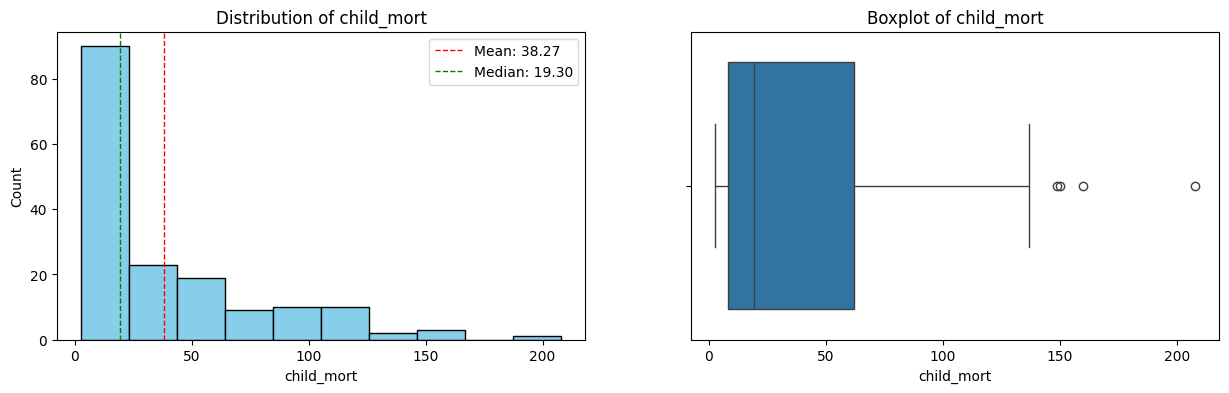


Analyzing Column: exports
Skewness: 2.45
   --> This distribution is significantly skewed.


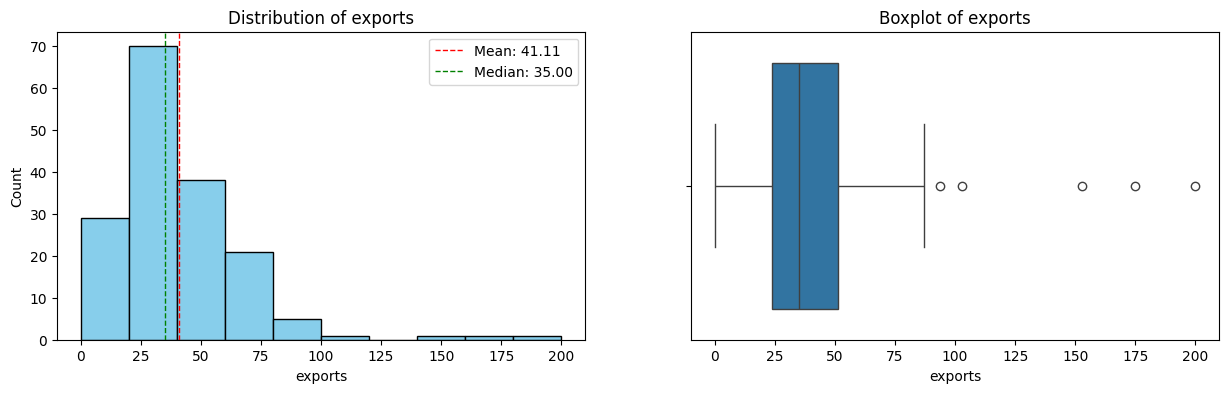


Analyzing Column: health
Skewness: 0.71
   --> This distribution is significantly skewed.


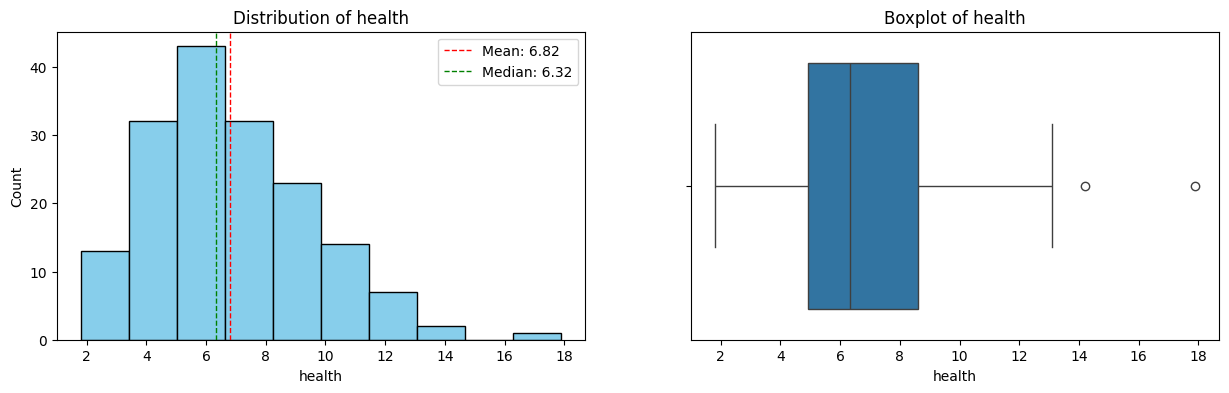


Analyzing Column: imports
Skewness: 1.91
   --> This distribution is significantly skewed.


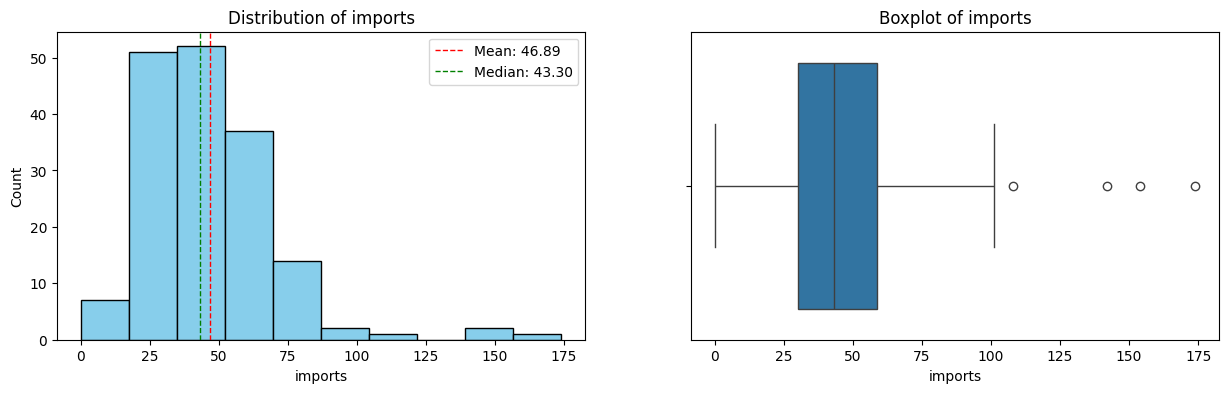


Analyzing Column: income
Skewness: 2.23
   --> This distribution is significantly skewed.


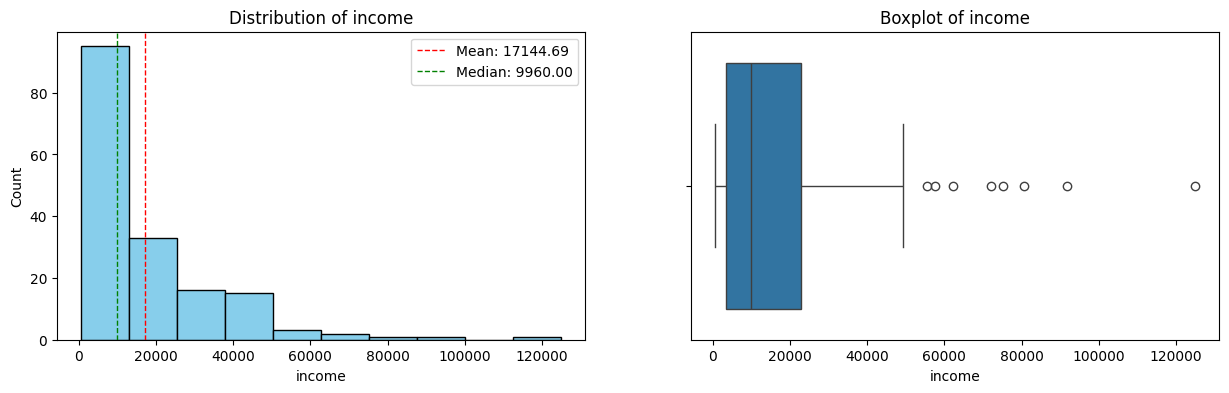


Analyzing Column: inflation
Skewness: 5.15
   --> This distribution is significantly skewed.


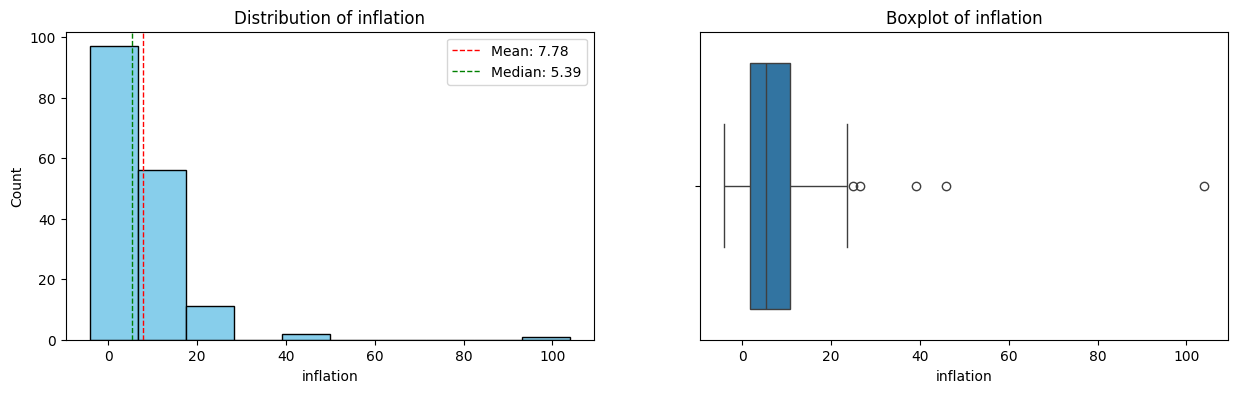


Analyzing Column: life_expec
Skewness: -0.97
   --> This distribution is significantly skewed.


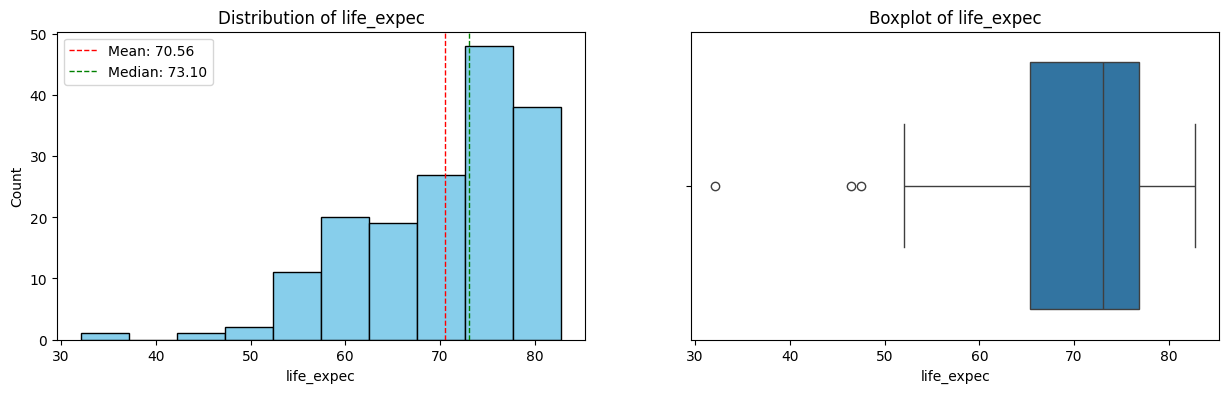


Analyzing Column: total_fer
Skewness: 0.97
   --> This distribution is significantly skewed.


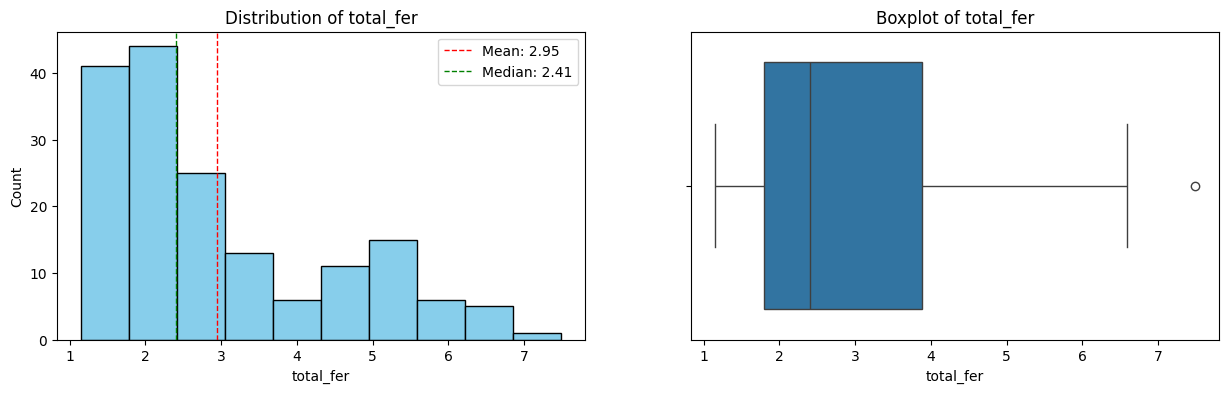


Analyzing Column: gdpp
Skewness: 2.22
   --> This distribution is significantly skewed.


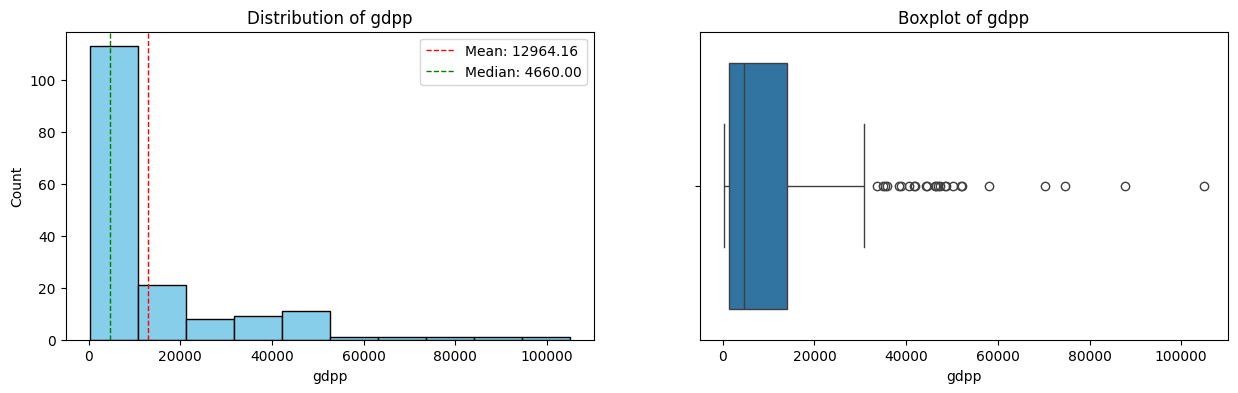

In [20]:
# Iterate through columns (excluding the first one)
for col in data.columns[1:]:

    # Print column name
    print(f"\nAnalyzing Column: {col}")  # Added newline for clarity

    skewness = round(data[col].skew(), 2) # Calculate and print skewness with a descriptive label
    print(f"Skewness: {skewness}")

    if abs(skewness) > 0.5:  # Add a skewness threshold for highlighting
        print("   --> This distribution is significantly skewed.")

    plt.figure(figsize=(15, 4)) # Create figure with specified size
    plt.subplot(1, 2, 1) # Histogram Subplot (1st column)

    # Plot histogram with descriptive title and labels
    plt.hist(data[col], bins=10, color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Count')

    # Add mean and median lines to histogram
    mean = data[col].mean() # Calculate the mean value of the current column
    median = data[col].median()  # Calculate the median value of the current column

    # Add a vertical line at the mean value on the histogram
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean:.2f}')
    # - mean: The x-coordinate where the line will be drawn (the mean value)
    # - color='red': Sets the line color to red
    # - linestyle='dashed': Makes the line a dashed line
    # - linewidth=1: Sets the line thickness to 1
    # - label=f'Mean: {mean:.2f}': Creates a label for the line that includes the text "Mean:" and the mean value formatted to two decimal places

    # Add a vertical line at the median value on the histogram
    plt.axvline(median, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median:.2f}') # - Same parameters as above, but the line is green and placed at the median value

    # Display a legend to show the meaning of the lines
    plt.legend() # This creates a small box within the plot area that shows the labels for the mean and median lines, helping the viewer understand what the lines represent.
    plt.subplot(1, 2, 2)      # Boxplot Subplot (2nd column)

    sns.boxplot(x=data[col]) # Plot boxplot with descriptive title
    plt.title(f"Boxplot of {col}")

    plt.show() # Display the plots for this column

In [ ]:
# for col in data.columns[1:]:
#     print(col)
#     print('Skew :', round(data[col].skew(), 2))
#     plt.figure(figsize = (15, 4))
#     plt.subplot(1, 2, 1)
#     data[col].hist(bins = 10, grid = False)
#     plt.ylabel('count')
#     plt.subplot(1, 2, 2)
#     sns.boxplot(x = data[col])
#     plt.show()

<b><font color="#ffa100">Observations:</font></b>

- As observed earlier, most of the variables have skewed distributions.
- The distribution for the % expenditure on health is relatively less skewed with fewer outliers.
- The life expectancy is the only variable which is skewed to the left meaning most of the countries have already been successful in achieving high life expectancy.
- The distribution for all other variables is highly skewed to the right. All these variables have some outliers to the right end.

<h2><b><font color='##a9b6ea'>Let's check the correlation among the variables</font></b></h2>

In [ ]:
data.select_dtypes(include = "number").columns.to_list()

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [22]:
import plotly.graph_objects as go

# Create num_cols with numerical columns in the data
num_cols = data.select_dtypes(include = "number").columns.to_list()

# Assuming 'data' is your DataFrame and 'num_cols' is the list of numeric columns
correlation_matrix = data[num_cols].corr()
matrix_values = np.triu(correlation_matrix)

# Create the Plotly Heatmap figure
fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.round(2),  # Display correlation values rounded to 2 decimal places
    x=num_cols, y=num_cols,
    zmin=-1, zmax=1,  # Set color scale to range from -1 (perfect negative correlation) to 1 (perfect positive correlation)
    colorscale='YlGnBu',  # Use the Yellow-Green-Blue color scale (same as in Seaborn)
    text=correlation_matrix.round(2), texttemplate="%{text}", hovertemplate='Feature x: %{x}<br>Feature y: %{y}<br>Correlation: %{z:.2f}', colorbar=dict(title='Correlation'),
))
# Customize the plot's appearance
fig.update_layout(
    title="Correlation Heatmap of Numeric Features", xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
    yaxis_tickangle=0,   # Keep y-axis labels horizontal
    width=1000, height=1000,  # Set width and height for larger plot (adjust as needed)
    plot_bgcolor='rgba(0,0,0,0)' # transparent background

)
# Hide upper triangle to avoid redundancy
fig.update_traces(z=matrix_values)
fig.show()

<b><font color="#ffa100">Observations:</font></b>

- There is a strong positive correlation between gdpp and income. This makes sense.
- The life expectancy is positively correlated with gdpp. This indicates that people live longer in richer countries.
- There is a strong negative correlation between life expectancy and child mortality. This is understandable.
- The child mortality is also seen to have a strong positive correlation with the fertility rate.

<h2><b><font color='##a9b6ea'>Scaling the data</font></b></h2>

- Clustering algorithms are distance-based algorithms, and all distance-based algorithms are affected by the scale of the variables. Therefore, we will scale the data before applying clustering.
- We will drop the variables `'country'` variable because it is unique for each country and would not add value to clustering.
- We will also drop the `'gdpp'` variable for now, because we want to see if we can identify clusters of countries without relying on GDP and see later if these clusters correspond to an average GDP value for the countries in each cluster.  

In [23]:
data_new = data.drop(columns = ["country", "gdpp"])

In [24]:
data_new.head(3)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89


In [26]:
# Scaling the data and storing the output as a new DataFrame
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_new), columns = data_new.columns)
data_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946


In [28]:
# Creating copy of the data to store labels from each algorithm
data_scaled_copy = data_scaled.copy(deep = True)

<h1><b><font color='#90EE90'>K-Means Clustering</font></b></h1>

In [29]:
import plotly.graph_objects as go
from sklearn.cluster import KMeans

# Empty dictionary to store the Squared Sum of Errors (SSE) for each value of K
sse = {}

# ELBOW METHOD (Within Cluster Sum of Squares (WCSS))
# Iterate for a range of Ks and fit the scaled data to the algorithm.
# Use inertia attribute from the clustering object and store the inertia value for that K
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data_scaled)
    sse[k] = kmeans.inertia_

# Convert the results to a DataFrame for Plotly
sse_df = pd.DataFrame(list(sse.items()), columns=["Number of Clusters", "SSE"])

# Determine the elbow point (assuming k=3 is the elbow point here)
elbow_k = 3
elbow_sse = sse[elbow_k]

fig = go.Figure() # Create the elbow plot

fig.add_trace(go.Scatter(x=sse_df["Number of Clusters"], y=sse_df["SSE"], mode='lines+markers', marker=dict(size=10), name='SSE'))

# Highlight the elbow point
fig.add_trace(go.Scatter(x=[elbow_k], y=[elbow_sse], mode='markers', marker=dict(size=12, color='red'), name='Elbow Point'))

# Add title and labels
fig.update_layout(
    title="Elbow Method for Optimal Number of Clusters",
    xaxis_title="Number of Clusters",
    yaxis_title="Sum of Squared Errors (SSE)",
    annotations=[
        go.layout.Annotation(x=elbow_k, y=elbow_sse, xref="x", yref="y", text="Elbow Point", showarrow=True, arrowhead=2, ax=-40, ay=-40)])

fig.show() # Show the plot

In [5]:
# # Empty dictionary to store the SSE for each value of K
# sse = {}

# # ELBOW METHOD
# # Iterate for a range of Ks and fit the scaled data to the algorithm.
# # Use inertia attribute from the clustering object and store the inertia value for that K
# for k in range(1, 10):
#     kmeans = KMeans(n_clusters = k, random_state = 1).fit(data_scaled)
#     sse[k] = kmeans.inertia_

# # Elbow plot
# plt.figure()
# plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
# plt.xlabel("Number of cluster")
# plt.ylabel("SSE")
# plt.show()

<b><font color="#ffa100">Observations:</font></b>

- We can see from the plot that there is a consistent dip from 2 to 8 and there doesn't seem to be a clear 'elbow' here. We may choose any number of clusters from 2 to 8.
- So, let's look at another method to get a 'second opinion'. Let's create a plot with Silhouette scores to see how it varies with K.

In [ ]:
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Empty dictionary to store the Silhouette score for each value of K
sc = {}

# Iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that K
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data_scaled)
    labels = kmeans.predict(data_scaled)
    sc[k] = silhouette_score(data_scaled, labels)

# Convert the results to a DataFrame for Plotly
sc_df = pd.DataFrame(list(sc.items()), columns=["Number of Clusters", "Silhouette Score"])

# Determine the elbow point (assuming k=3 is the elbow point here)
elbow_k = 3
elbow_sc = sc[elbow_k]

# Create the silhouette score plot
fig = go.Figure()

fig.add_trace(go.Scatter(x=sc_df["Number of Clusters"], y=sc_df["Silhouette Score"], mode='lines+markers', marker=dict(size=10), name='Silhouette Score'))

# Highlight the elbow point
fig.add_trace(go.Scatter(x=[elbow_k], y=[elbow_sc], mode='markers', marker=dict(size=12, color='red'), name='Elbow Point'))

# Add title and labels
fig.update_layout(
    title="Silhouette Score for Optimal Number of Clusters",
    xaxis_title="Number of Clusters",
    yaxis_title="Silhouette Score",
    annotations=[
        go.layout.Annotation(x=elbow_k, y=elbow_sc, xref="x", yref="y", text="Elbow Point", showarrow=True, arrowhead=2, ax=-40, ay=-40)])

# Show the plot
fig.show()

In [6]:
# # Empty dictionary to store the Silhouette score for each value of K
# sc = {}

# # Iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that K
# for k in range(2, 10):
#     kmeans = KMeans(n_clusters = k, random_state = 1).fit(data_scaled)
#     labels = kmeans.predict(data_scaled)
#     sc[k] = silhouette_score(data_scaled, labels)

# # Elbow plot
# plt.figure()
# plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
# plt.xlabel("Number of cluster")
# plt.ylabel("Silhouette Score")
# plt.show()

<b><font color="#ffa100">Observations:</font></b>

- We observe from the plot that the silhouette score is the highest for K=3. Let's first understand these 3 clusters.

In [ ]:
kmeans = KMeans(n_clusters = 4, random_state = 1)

kmeans.fit(data_scaled)

# Adding predicted labels to the original data and the scaled data
data_scaled_copy['KMeans_Labels'] = kmeans.predict(data_scaled)

data['KMeans_Labels'] = kmeans.predict(data_scaled)

In [ ]:
data['KMeans_Labels'].value_counts()

,count
KMeans_Labels,
1,73
2,49
3,42
0,3


<b><font color="#ffa100">Observations:</font></b>

- This looks like a very skewed clustering, with only three observations in one cluster and more than a hundred in another. Let's check out the profiles of these clusters.

In [ ]:
# Calculating the mean and the median of the original data for each label
num_cols = num_cols + ["KMeans_Labels"]

# Ensure 'KMeans_Labels' is a 1D array
data['KMeans_Labels'] = data['KMeans_Labels'].ravel()  #This line is likely redundant as predict already returns a 1D array

mean = data[num_cols].groupby('KMeans_Labels').mean()
median = data[num_cols].groupby('KMeans_Labels').median()
df_kmeans = pd.concat([mean, median], axis = 0)
df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_3 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median', 'group_3 Median']

df_kmeans.T

,group_0 Mean,group_1 Mean,group_2 Mean,group_3 Mean,group_0 Median,group_1 Median,group_2 Median,group_3 Median
child_mort,4.133333,27.057534,6.373469,97.409524,2.80,21.10,5.20,91.300
exports,176.000000,38.966973,47.291837,27.983571,175.00,35.40,40.10,22.800
health,6.793333,5.844795,8.730816,6.270476,7.77,5.60,9.11,5.260
imports,156.666667,46.280355,45.220408,42.057143,154.00,48.60,43.30,39.750
income,64033.333333,10986.164384,35392.244898,3210.785714,72100.00,9470.00,32500.00,1775.000
inflation,2.468000,8.807000,2.631755,12.387976,3.62,7.04,1.57,9.020
life_expec,81.433333,71.179452,78.808163,59.066667,81.30,71.60,79.80,59.800
total_fer,1.380000,2.514932,1.754694,5.204762,1.36,2.48,1.78,5.205
gdpp,57566.666667,5227.150685,31527.346939,1568.857143,46600.00,4340.00,30700.00,733.000


<b><font color="#ffa100">Observations:</font></b>

- It looks like Cluster 2 belongs to high income countries which also have high gdpp.
- Cluster 1 seems to be of low income countries, with low mean gdp as well.
- The remaining countries are in Cluster 0 which also happens to be the biggest cluster. Since the number of developing countries is larger than the group of highly developed countries, this intuitively makes sense.

Let us now visualize the summary statistics of these clusters below.

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Assuming data and cols_visualise are already defined
cols_visualise = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

for col in cols_visualise:
    fig = go.Figure()

    for label in data['KMeans_Labels'].unique():
        cluster_data = data[data['KMeans_Labels'] == label][col]
        quartiles = cluster_data.quantile([0.25, 0.5, 0.75])
        iqr = quartiles[0.75] - quartiles[0.25]
        lower_whisker = cluster_data[cluster_data >= quartiles[0.25] - 1.5 * iqr].min()
        upper_whisker = cluster_data[cluster_data <= quartiles[0.75] + 1.5 * iqr].max()

        fig.add_trace(go.Box(y=cluster_data, name=str(label),
            boxpoints='all', # Show all points
            jitter=0.5,      # Spread the points
            whiskerwidth=0.2, marker_size=2, line_width=1, showlegend=False,
            marker=dict(color='blue' if label == 'Upper Whisker' else 'green')))

        # Highlight lower whisker points
        fig.add_trace(go.Scatter(
            x=[str(label)] * cluster_data[cluster_data == lower_whisker].shape[0],
            y=cluster_data[cluster_data == lower_whisker],
            mode='markers',
            marker=dict(color='red', size=6),
            name='Lower Whisker',
            showlegend=False
        ))

        # Highlight upper whisker points
        fig.add_trace(go.Scatter(
            x=[str(label)] * cluster_data[cluster_data == upper_whisker].shape[0],
            y=cluster_data[cluster_data == upper_whisker],
            mode='markers',
            marker=dict(color='red', size=6),
            name='Upper Whisker',
            showlegend=False
        ))

    fig.update_layout(
        title=f'Box Plot of {col} by KMeans Labels',
        xaxis_title="KMeans Labels",
        yaxis_title=col,
        annotations=[
            dict(
                x=0.5,
                y=-0.15,
                xref="paper",
                yref="paper",
                showarrow=False,
                text=f"Box plot showing distribution of {col} across different KMeans clusters"
            )
        ]
    )

    fig.show()

<h3><b>Other way of visualizing the same results

In [ ]:
import plotly.express as px
import pandas as pd

# Assuming data and cols_visualise are already defined
cols_visualise = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

for col in cols_visualise:
    fig = px.box(data, x='KMeans_Labels', y=col, points="all",
                 title=f'Box Plot of {col} by KMeans Labels',
                 labels={'KMeans_Labels': 'KMeans Labels', col: col})

    fig.update_layout(
        xaxis_title="KMeans Labels",
        yaxis_title=col,
        annotations=[
            dict(
                x=0.5,
                y=-0.15,
                xref="paper",
                yref="paper",
                showarrow=False,
                text=f"Box plot showing distribution of {col} across different KMeans clusters"
            )
        ]
    )

    fig.show()

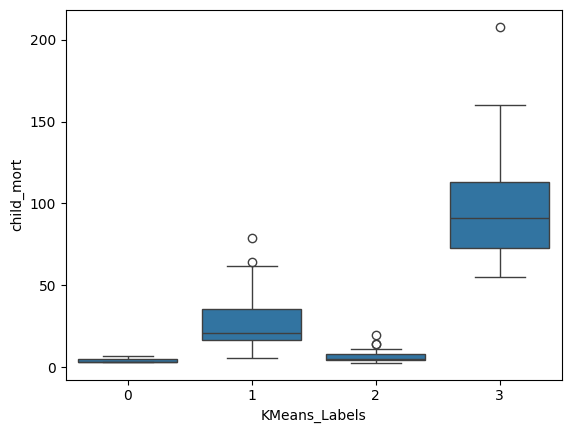

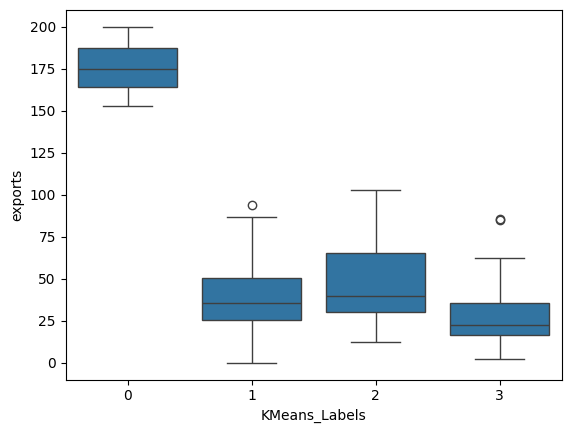

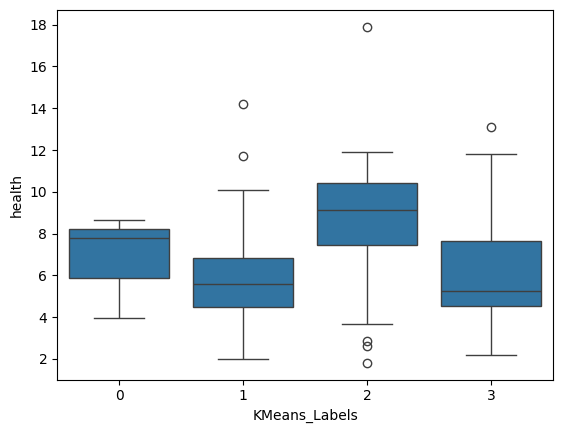

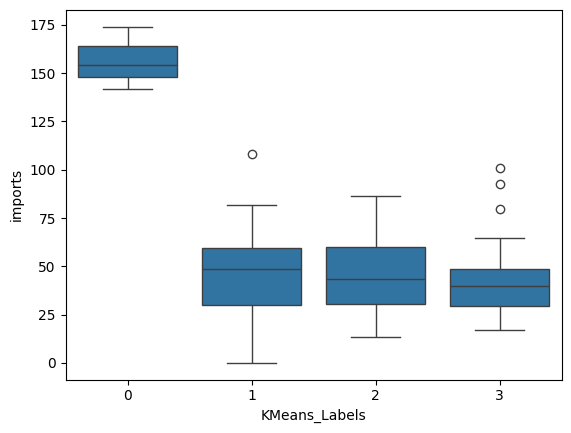

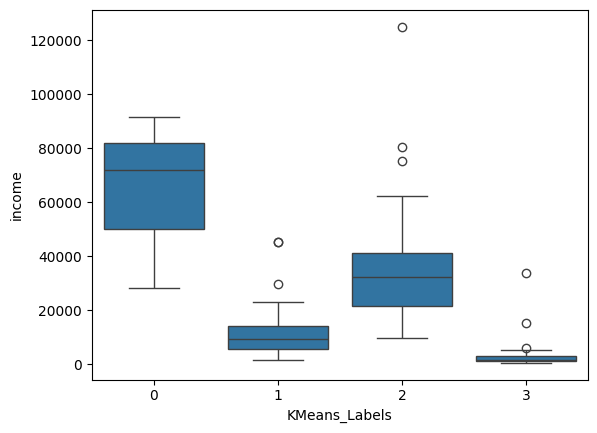

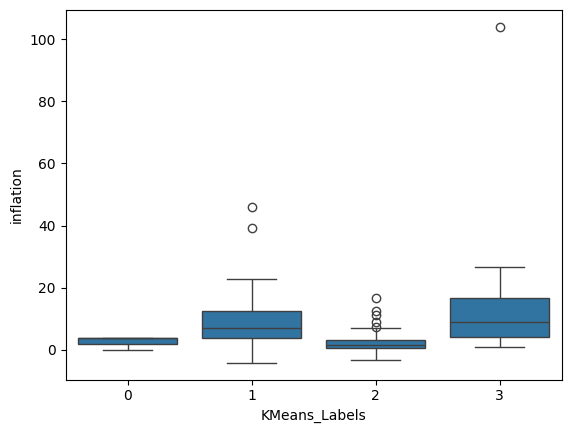

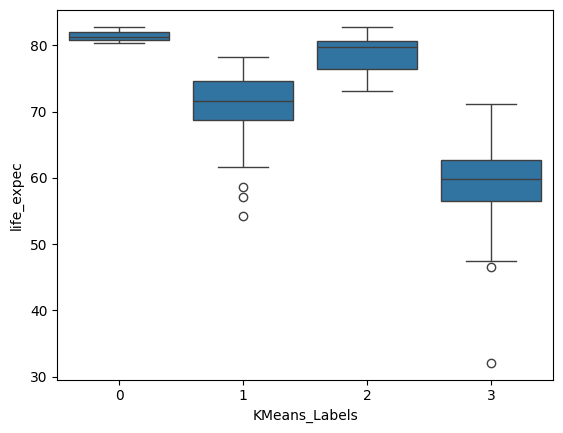

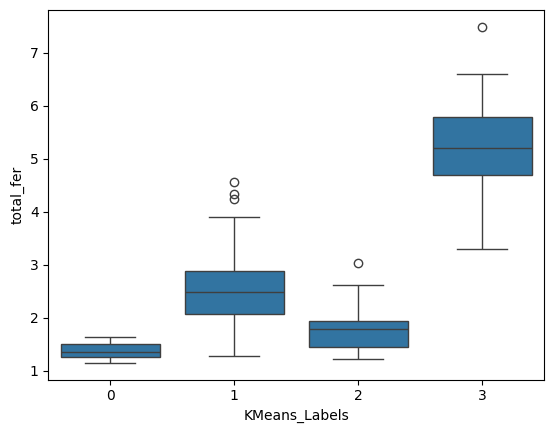

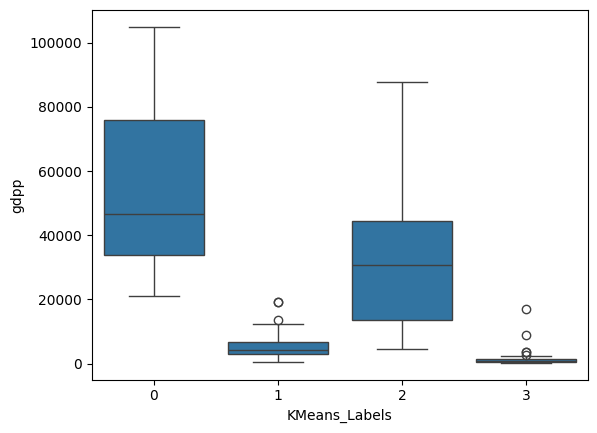

In [ ]:
cols_visualise = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

for col in cols_visualise:
    sns.boxplot(x = 'KMeans_Labels', y = col, data = data)
    plt.show()

<b><font color="#ffa100">Cluster Profiles:</font></b>

- Cluster 2 has only 3 observations. As observed from the scatter plots and the boxplots, this group **consists of outlier high income countries** with the highest percentages of imports and exports in terms of GDP.
- Cluster 1 seems to have countries with less desirable values for many indicators. These countries seem to have the highest inflation rates, the lowest GDP per capita, the lowest exports as well as imports - all signaling a very poor economic situation. These countries also have the highest child mortalities, the highest fertility rates, and the lowest life expectancies. These characteristics are traits of **underdeveloped or developing countries**. These countries also seem to have a trade deficit, i.e., more imports than exports, and as a consequence, may be more reliant on borrowing and lines of credit to finance their economy.
- Cluster 0 is the largest cluster with traits of countries that fall in the **middle of the development spectrum**. These countries have a comparatively better state of affairs than the countries in cluster 1. However, this cluster has a large range of values, indicating that it is a mix of many different types of countries. Ideally, we do not want a cluster to be like this as the fundamental idea behind clustering is to 'group similar things' and this cluster seems to have a lot of 'dissimilarity' within it.
- Overall, this clustering solution does give us good insights into potential clusters of similar countries but is not very useful as it is impacted by outlier countries resulting in one very small cluster and two very big clusters. We should try other algorithms to see if we can do better.

But before that, let's validate if these clusters relate well with the GDP of the country.

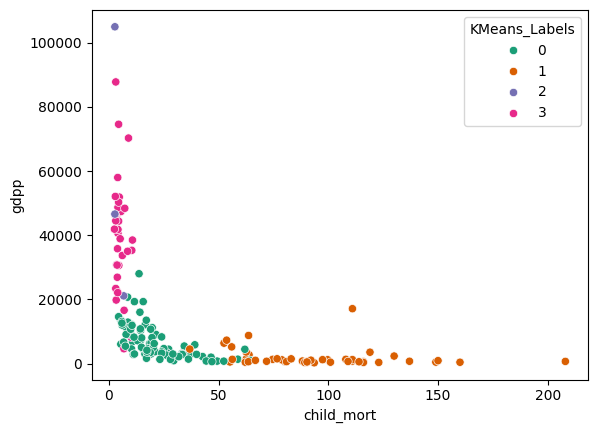

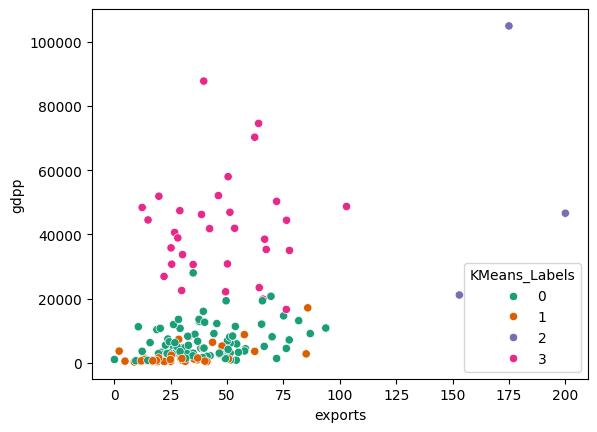

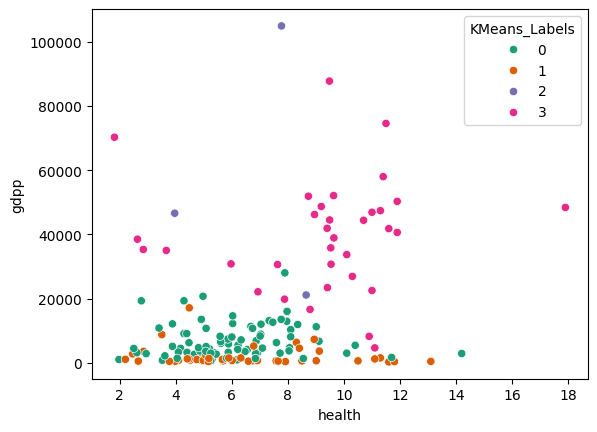

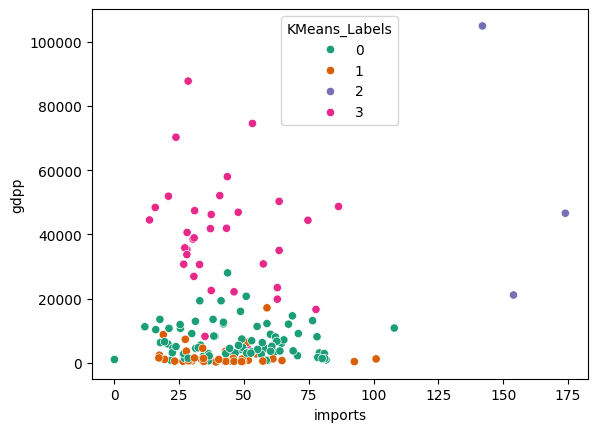

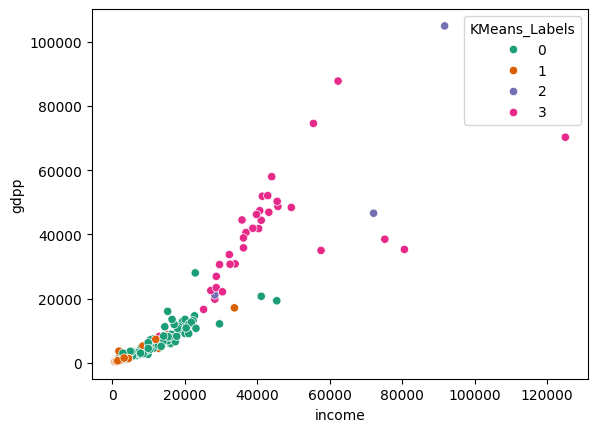

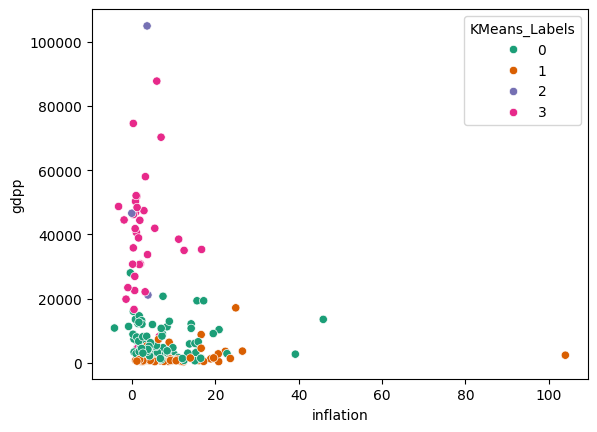

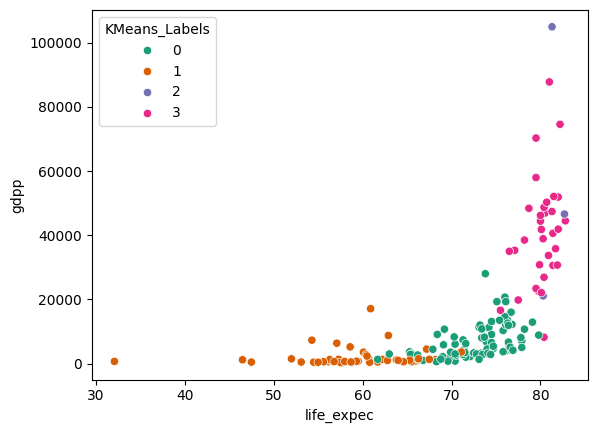

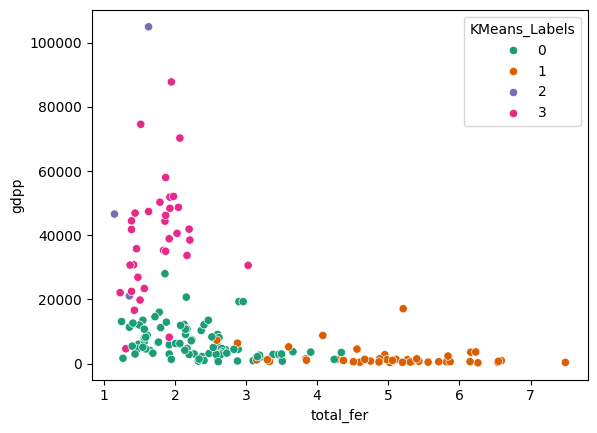

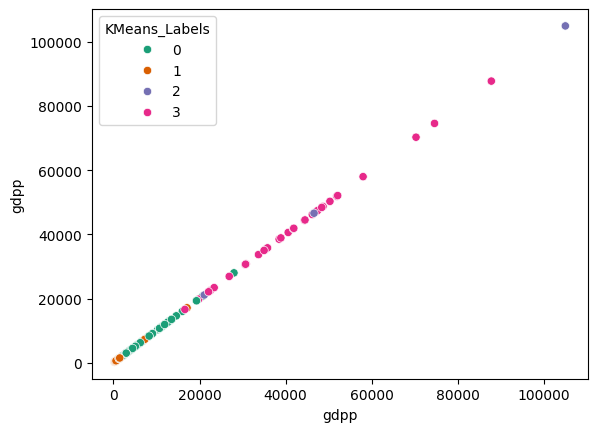

In [ ]:
cols_visualise = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

for col in cols_visualise:
    sns.scatterplot(x = col, y = 'gdpp', data = data, hue = 'KMeans_Labels', palette = 'Dark2')

    plt.show()

<b><font color="#ffa100">Observations:</font></b>

- The countries with higher fertility rates also seem to have higher populations, corresponding with lower per capita income in these countries.
- The child mortality also seems to be negatively correlated with the GDP of the country. The high child mortality in such countries could be due to several reasons such as high poverty or lower net income per person and a relative lack of health facilities among others.

Let's try another algorithm

In [ ]:
# create the dataframe with the labels in the original dataset
data_scaled_copy = data_scaled_copy.reset_index()
data = data.reset_index()

In [ ]:
data.sample(10)

,index,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Labels
81,81,Kiribati,62.7,13.3,11.30,79.9,1730,1.52,60.7,3.84,1490,3
62,62,Guatemala,35.4,25.8,6.85,36.3,6710,5.14,71.3,3.38,2830,1
149,149,Timor-Leste,62.6,2.2,9.12,27.8,1850,26.50,71.1,6.23,3600,3
36,36,Comoros,88.2,16.5,4.51,51.7,1410,3.87,65.9,4.75,769,3
117,117,Panama,19.7,70.0,8.10,78.2,15400,2.59,77.8,2.62,8080,2
29,29,Canada,5.6,29.1,11.30,31.0,40700,2.87,81.3,1.63,47400,2
25,25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.81,57.9,5.87,575,3
83,83,Kyrgyz Republic,29.6,51.6,6.18,81.7,2790,10.00,68.5,3.10,880,1
47,47,Egypt,29.1,21.3,4.66,26.6,9860,10.10,70.5,3.19,2600,1
129,129,Senegal,66.8,24.9,5.66,40.3,2180,1.85,64.0,5.06,1000,3


In [ ]:
# Rename the labels of the K-means clustering (label 0: Underdeveloped, Label 1: Developing, Label 2: Developed) to the dataframe data that has labels
# create the labels for "KMeans_Labels" label 0: with Underdeveloped, Label 1: Developing, Label 2: Developed
data_scaled_copy['KMeans_Labels'] = data_scaled_copy['KMeans_Labels'].map({0: 'Underdeveloped', 1: 'Developing', 2: 'Developed'})
data['KMeans_Labels'] = data_scaled_copy['KMeans_Labels']
data.head()

,index,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Labels
0,0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,NaN
1,1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Developing
2,2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Developing
3,3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,NaN
4,4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Developing


<h1><b><font color='#90EE90'>K-Medoids Clustering</font></b></h1>

In [ ]:
kmedo = KMedoids(n_clusters = 4, random_state = 1)
kmedo.fit(data_scaled)

data_scaled_copy['kmedoLabels'] = kmedo.predict(data_scaled)
data['kmedoLabels'] = kmedo.predict(data_scaled)

In [ ]:
data.kmedoLabels.value_counts()

,count
kmedoLabels,
0,48
2,47
3,41
1,31


In [ ]:
# Calculating the mean and the median of the original data for each label
original_features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer' ]
num_cols = original_features + ['kmedoLabels']

mean = data[num_cols].groupby('kmedoLabels').mean()
median = data[num_cols].groupby('kmedoLabels').median()

df_kmedoids = pd.concat([mean, median], axis = 0)
df_kmedoids.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_3 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median', 'group_3 Median']

df_kmedoids[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_3 Mean,group_0 Median,group_1 Median,group_2 Median,group_3 Median
child_mort,16.631250,5.041935,92.961702,26.031707,13.500,4.20,90.20,19.80
exports,59.870833,47.896774,29.151277,27.719244,51.500,39.70,23.80,26.90
health,6.476458,9.522581,6.388511,5.655854,6.195,9.63,5.66,5.44
imports,66.485417,41.912903,42.323404,32.947949,62.000,35.00,40.30,31.40
income,17450.833333,44529.677419,3942.404255,11214.878049,15300.000,40400.00,1870.00,9530.00
inflation,4.363104,2.559548,12.019681,10.874780,2.750,1.22,8.92,8.41
life_expec,73.564583,80.432258,59.187234,72.597561,74.300,80.40,59.50,73.30
total_fer,2.098333,1.788065,5.008085,2.458049,1.910,1.86,5.06,2.41


<b><font color="#ffa100">Observations:</font></b>
- It looks like Cluster 0 belongs to high income countries, Cluster 2 has poorer countries with low incomes, and the remaining countries are in Cluster 1, which happens to be the biggest cluster as well.

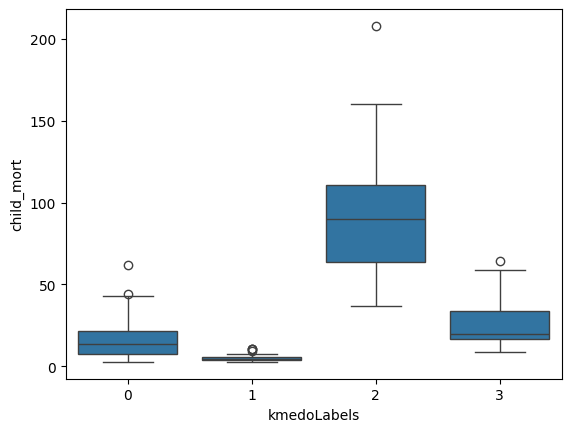

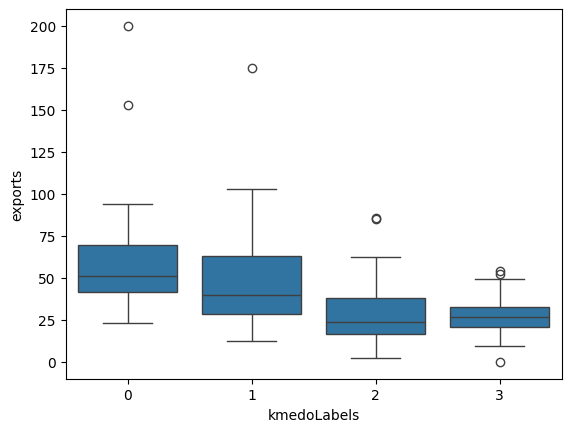

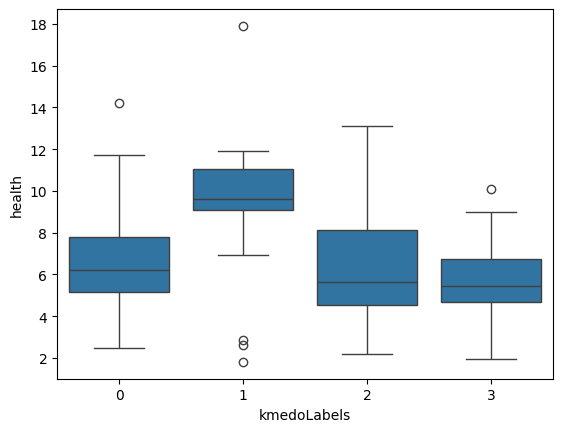

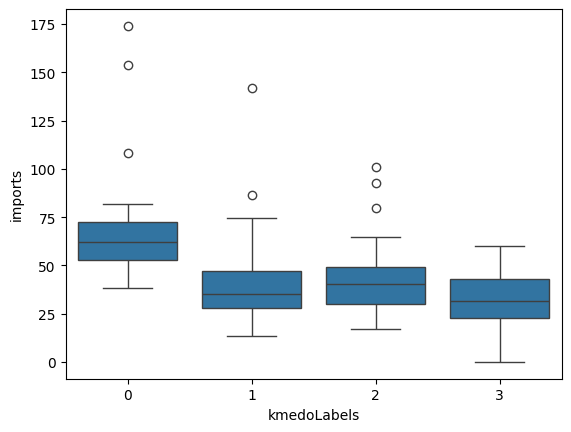

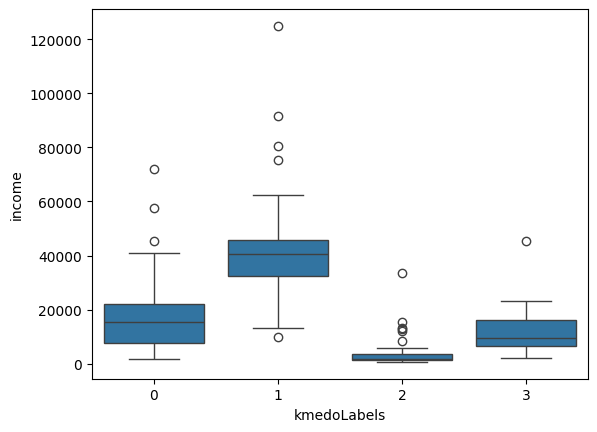

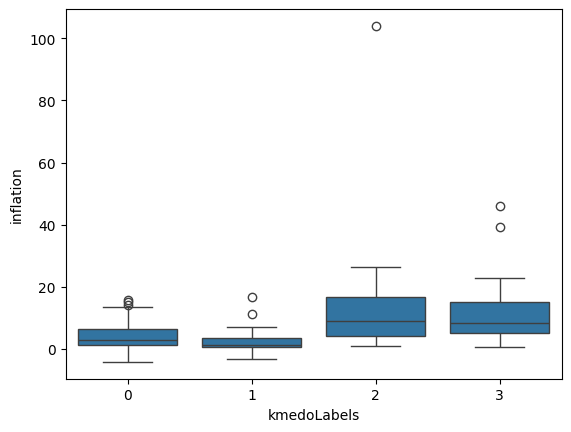

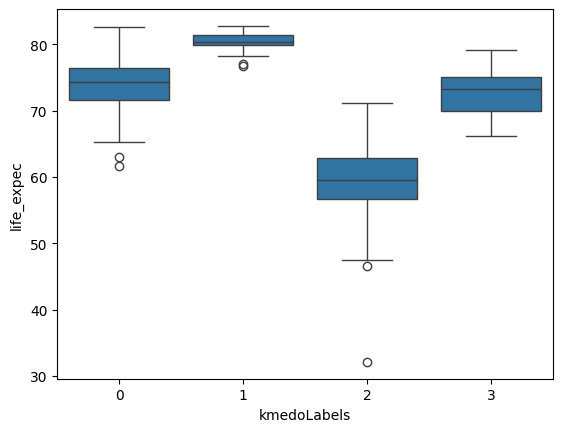

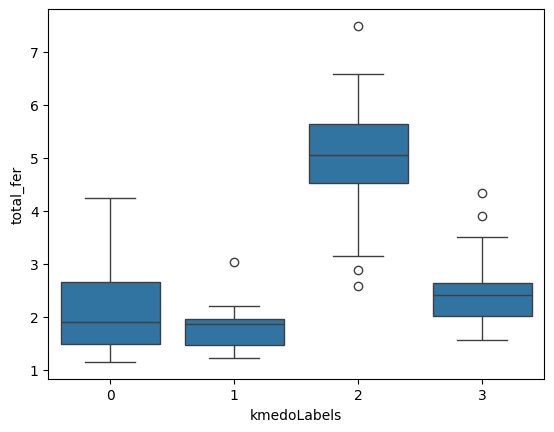

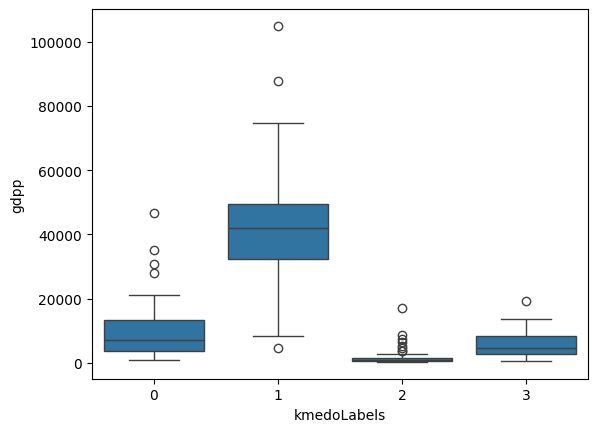

In [ ]:
for col in cols_visualise:
    sns.boxplot(x = 'kmedoLabels', y = col, data = data)

    plt.show()

<b><font color="#ffa100">Cluster Profiles:</font></b>

- Cluster 2 countries have the highest average child mortality rate, trade deficit, inflation rate and least average GDP and net income per person. But the large range of values for different variables implies that cluster 2 contains a variety of countries, from **underdeveloped to developing** ones.
- Cluster 1 shows traits of **developing countries** with comparatively higher GDP, net income per person and significantly lower child mortality rate as compared to cluster 2. The cluster consists of some outliers but majorly it consists of countries with low to medium GDP, with a comparatively higher percentage of imports and exports vs GDP.
- Cluster 0 shows traits of **highly developed countries** with a low child mortality rate and a higher net income per person, life expectancy, and GDP. These countries have the highest average expenditure on health as a percentage of GDP.

<b><font color="#ffa100">Observations:</font></b>

- The number of observations for each cluster from K-Medoids is more evenly distributed in comparison to K-Means clustering.
- This is because the clusters from K_Medoids are less affected by outliers from the data. As we observe, the three outlier countries from K-Means (in terms of imports and exports) are now included in cluster 1 and do not form a separate cluster like in K-Means.
- Unlike in K-Means, the cluster for developed countries is much bigger but still retains the overall characteristics of developed countries, as reflected in the higher values for income per person, life expectancy, and especially in health expenditure as a percentage of GDP.

Now, let's see what we get with Gaussian Mixture Model.

<h1><b><font color='#90EE90'>Gaussian Mixture Model</font></b></h1>

<b><font color="#ffa100">Definition</font></b>

A Gaussian Mixture Model (GMM) is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters.  In clustering, GMMs are used to assign probabilities to data points for belonging to each of these Gaussian components (clusters).

<b><font color="#ffa100">How it Works:</font></b>

1. **Initialization:**  Start by assuming a certain number of clusters (components) and initializing their parameters (mean, covariance, and weight/mixing coefficient).
2. **Expectation Step (E-step):** For each data point, calculate the probability that it belongs to each cluster based on the current parameters.
3. **Maximization Step (M-step):** Update the parameters of each cluster (mean, covariance, and weight) based on the probabilities calculated in the E-step.
4. **Repeat:** Iterate the E-step and M-step until convergence (the parameters stop changing significantly).

The result is a set of Gaussian distributions, each representing a cluster, along with the probabilities that each data point belongs to each cluster.

<b><font color="#ffa100">Calculation:</font></b>

* The calculation involves maximizing the likelihood of the data given the model parameters. This is typically done using an iterative algorithm called Expectation-Maximization (EM).

<b><font color="#ffa100">Use Cases:</font></b>

* **Soft Clustering:** GMMs are well-suited for scenarios where data points might belong to multiple clusters with varying degrees of membership (unlike hard clustering methods like K-means, where each point belongs to exactly one cluster).
* **Density Estimation:** GMMs can also be used for density estimation, where the goal is to estimate the underlying probability distribution of the data.
* **Data Generation:**  After fitting a GMM to data, you can generate new synthetic data points that follow the same distribution.
* **Image Segmentation:** GMMs can be used to segment images into different regions based on color and texture.
* **Anomaly Detection:** By modeling normal data using GMMs, you can identify outliers that don't fit the pattern.

<b><font color="#ffa100">Important Considerations</font></b>

* **Number of Components:** Choosing the right number of components is crucial. You can use techniques like the Bayesian Information Criterion (BIC) or the Akaike Information Criterion (AIC) to help you select the optimal number.
* **Initialization:**  GMMs are sensitive to the initial parameter values. Different initialization methods might lead to different results.
* **Computationally Expensive:**  The EM algorithm can be computationally expensive for large datasets.

In [ ]:
gmm = GaussianMixture(n_components = 4, random_state = 1)
gmm.fit(data_scaled)
data_scaled_copy['GmmLabels'] = gmm.predict(data_scaled)
data['GmmLabels'] = gmm.predict(data_scaled)

In [ ]:
data.GmmLabels.value_counts()

,count
GmmLabels,
0,80
3,58
2,16
1,13


In [ ]:
# Calculating the mean and the median of the original data for each label
original_features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
num_cols = original_features + ['GmmLabels']

mean = data[num_cols].groupby('GmmLabels').mean()
median = data[num_cols].groupby('GmmLabels').median()

df_gmm = pd.concat([mean, median], axis = 0)
df_gmm.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_3 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median', 'group_3 Median']

df_gmm[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_3 Mean,group_0 Median,group_1 Median,group_2 Median,group_3 Median
child_mort,57.976250,83.661538,10.206250,8.656897,52.450,63.90,9.750,6.150
exports,32.316237,33.861538,92.737500,40.618966,29.350,25.30,73.800,37.300
health,5.582625,8.583846,4.915000,8.644483,5.235,9.12,4.125,8.540
imports,41.873324,58.869231,74.506250,43.506897,41.500,58.90,64.500,43.450
income,6000.787500,6529.230769,50312.500000,25745.172414,4345.000,3340.00,45350.000,22500.000
inflation,9.101700,23.837692,7.158375,2.534586,8.100,17.20,7.125,1.700
life_expec,65.407500,60.361538,77.681250,77.975862,66.250,60.80,77.450,78.050
total_fer,3.800000,4.058462,2.111250,1.754655,3.505,3.84,2.155,1.685
gdpp,2723.575000,3881.384615,31684.375000,23960.689655,1420.000,2330.00,20900.000,15300.000


**Observation:**

- Cluster 1 belongs to high income countries, Cluster 0 belongs to lower income countries, and the rest of the countries are in Cluster 2.

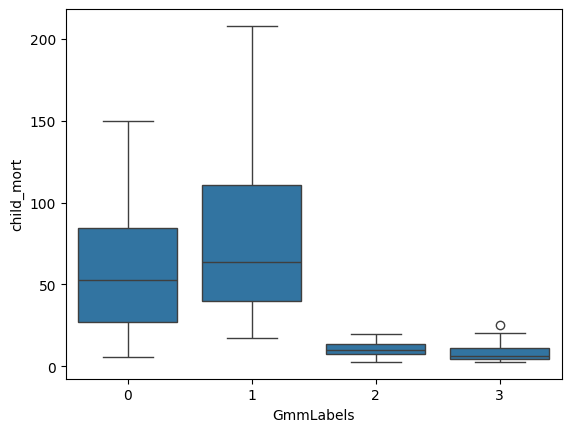

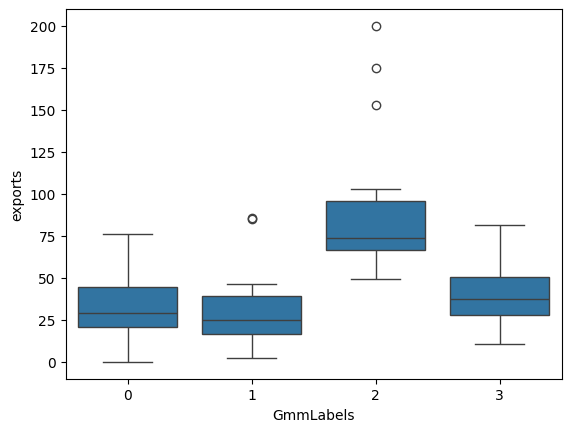

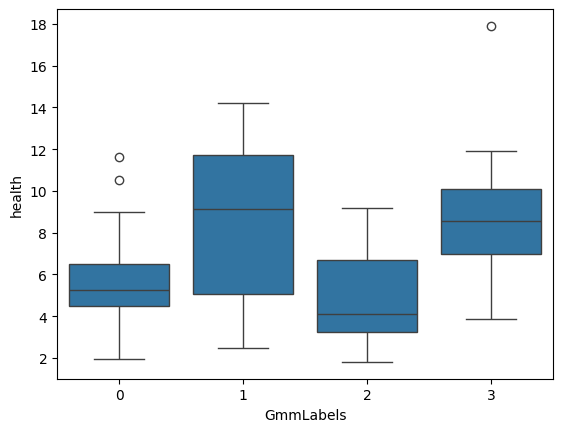

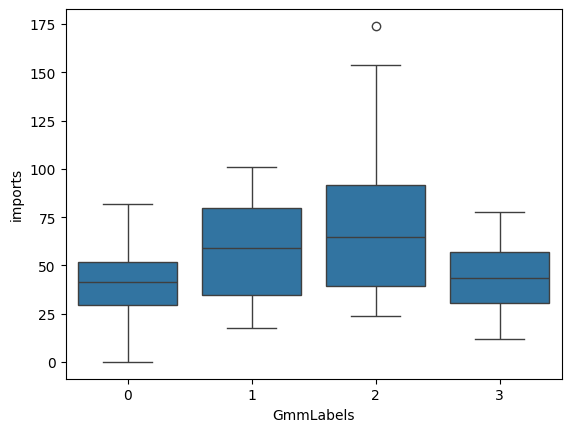

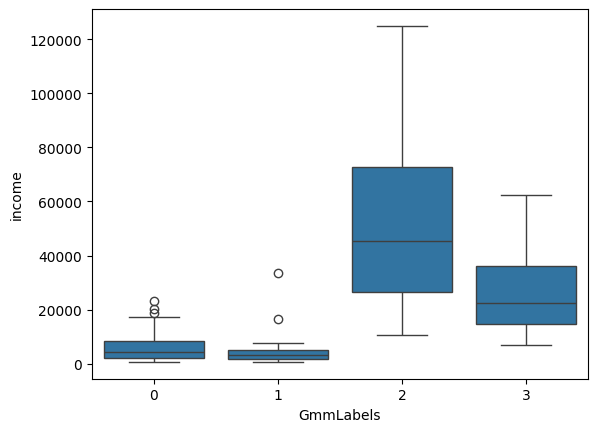

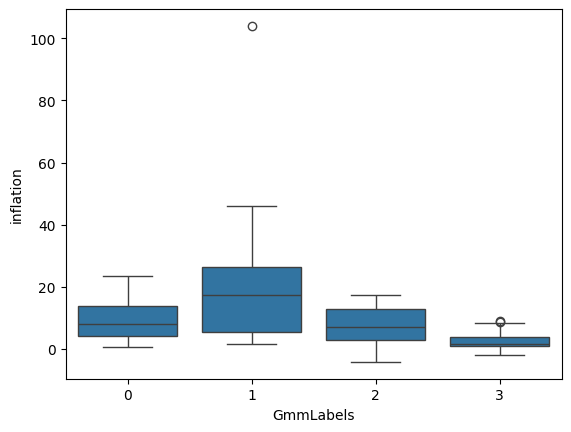

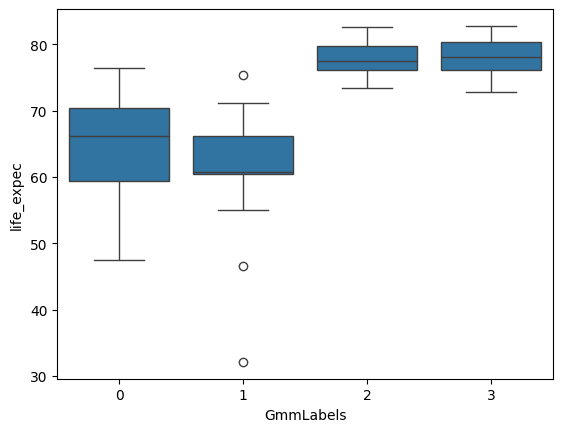

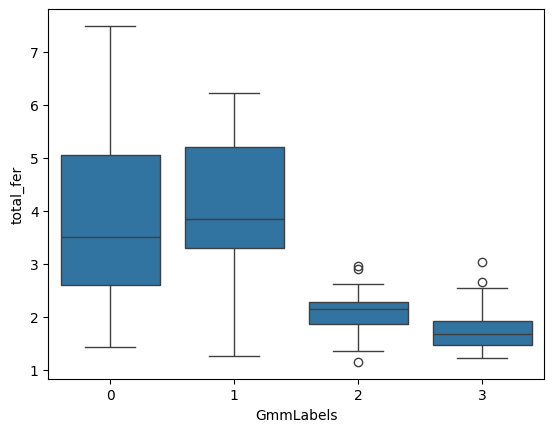

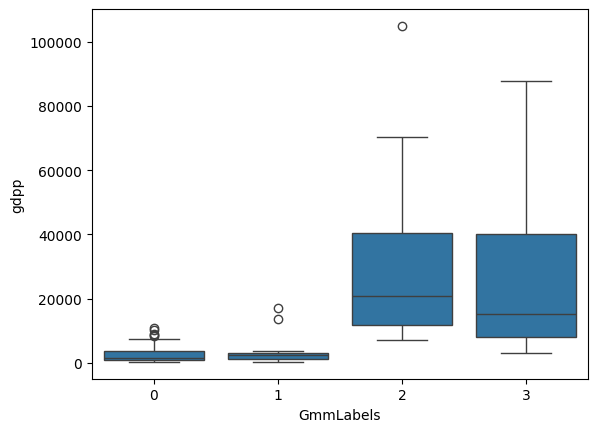

In [ ]:
cols_visualise = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

for col in cols_visualise:
    sns.boxplot(x = 'GmmLabels', y = col, data = data)

    plt.show()

**Cluster Profiles:**

- This clustering solution looks very similar to the once created using K-Medoids with one cluster of 'high income' countries, one of 'low income' and one of 'all the others'. But on closer inspection, we can identify some important differences in this solution using GMM.

- Cluster 1 seems to be of 'developed' countries but this time the median values for all the key indicators have all improved in comparison to the same cluster obtained from K-Medoids, with a higher GDP per capita, higher income, higher exports and imports and marginally higher life expectancy. At the same time, it has lower inflation rates, lower child mortality rates, and lower fertility as well. Overall, we can say that this cluster has become more 'pure' in comparison to the one from K-Medoids.

- Cluster 0 seems to be of 'underdeveloped' countries but this time the median values for all the key indicators have improved in comparison to the corresponding K-Medoids cluster. For e.g., it has higher GDP per capita, higher income per person, higher exports and imports, and slightly better health expenditure and life expectancy. That means that this cluster of 'underdeveloped' countries has become less 'pure'.

- Both of the above points can give an idea of what might have happened to the third cluster, i.e., Cluster 2. It was a mix of 'underdeveloped' & 'developing' countries and continues to be so, but it has gained some countries on the rich end of the spectrum, and some countries on the 'underdeveloped' end have moved to the last cluster.

Overall, this is a slightly more evenly distributed clustering solution than K-Medoids.

In [ ]:
df_gmm.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
group_0 Mean,57.976250,32.316237,5.582625,41.873324,6000.787500,9.101700,65.407500,3.800000,2723.575000
group_1 Mean,83.661538,33.861538,8.583846,58.869231,6529.230769,23.837692,60.361538,4.058462,3881.384615
group_2 Mean,10.206250,92.737500,4.915000,74.506250,50312.500000,7.158375,77.681250,2.111250,31684.375000
group_3 Mean,8.656897,40.618966,8.644483,43.506897,25745.172414,2.534586,77.975862,1.754655,23960.689655
group_0 Median,52.450000,29.350000,5.235000,41.500000,4345.000000,8.100000,66.250000,3.505000,1420.000000


<h1><b><font color='#90EE90'>Hierarchical Clustering</font></b></h1>

<b><font color="#ffa100">Definition</font></b>

Hierarchical clustering is a method that builds a hierarchy of clusters, creating a tree-like structure known as a dendrogram. This allows you to visualize how data points are grouped at different levels of similarity, ranging from individual points to a single, all-encompassing cluster.

<b><font color="#ffa100">How it Works:</font></b>

There are two main approaches:

1. **Agglomerative (Bottom-up):**
   - Start with each data point as its own cluster.
   - Repeatedly merge the two closest clusters until all points are in a single cluster.

2. **Divisive (Top-down):**
   - Start with all data points in a single cluster.
   - Recursively split the cluster into smaller clusters until each point is in its own cluster.

The key decision in hierarchical clustering is how to measure the distance or similarity between clusters. Common methods include:

* **Single Linkage:** Distance between the nearest points of two clusters.
* **Complete Linkage:** Distance between the farthest points of two clusters.
* **Average Linkage:** Average distance between all pairs of points from two clusters.
* **Ward's Method:**  Minimizes the increase in variance within clusters when merging.

<b><font color="#ffa100">Calculations</font></b>
1. Calculate the distance (or similarity) matrix between all pairs of data points.
2. Find the two closest clusters (or points if at the start).
3. Merge the closest clusters into a single cluster.
4. Update the distance matrix.
5. Repeat steps 2-4 until all points are in a single cluster.

<b><font color="#ffa100">Use Cases:</font></b>

* **Understanding data structure:** Hierarchical clustering helps you visualize the hierarchical relationships between data points and identify natural groupings at various levels.
* **Exploratory data analysis:** It's useful when you don't know the number of clusters beforehand.
* **Biological applications:**  It's often used in evolutionary biology and genetics to create phylogenetic trees.
* **Customer segmentation:** It can help businesses group customers based on their behaviors or preferences.
* **Social network analysis:** It can identify communities or groups within social networks.

<b><font color="#ffa100">Important Considerations</font></b>
* **Linkage Method:** The choice of linkage method influences the shape of the clusters.
* **Distance Metric:**  The distance metric used (e.g., Euclidean, Manhattan) affects the results.
* **Interpretability:** Dendrograms can be complex to interpret, especially for large datasets.

- Let's try to create clusters using Agglomerative Hierarchical clustering.
- Here, we decide the number of clusters using a concept called `Dendrogram` which is a tree-like diagram that records the sequences of merges or splits.

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

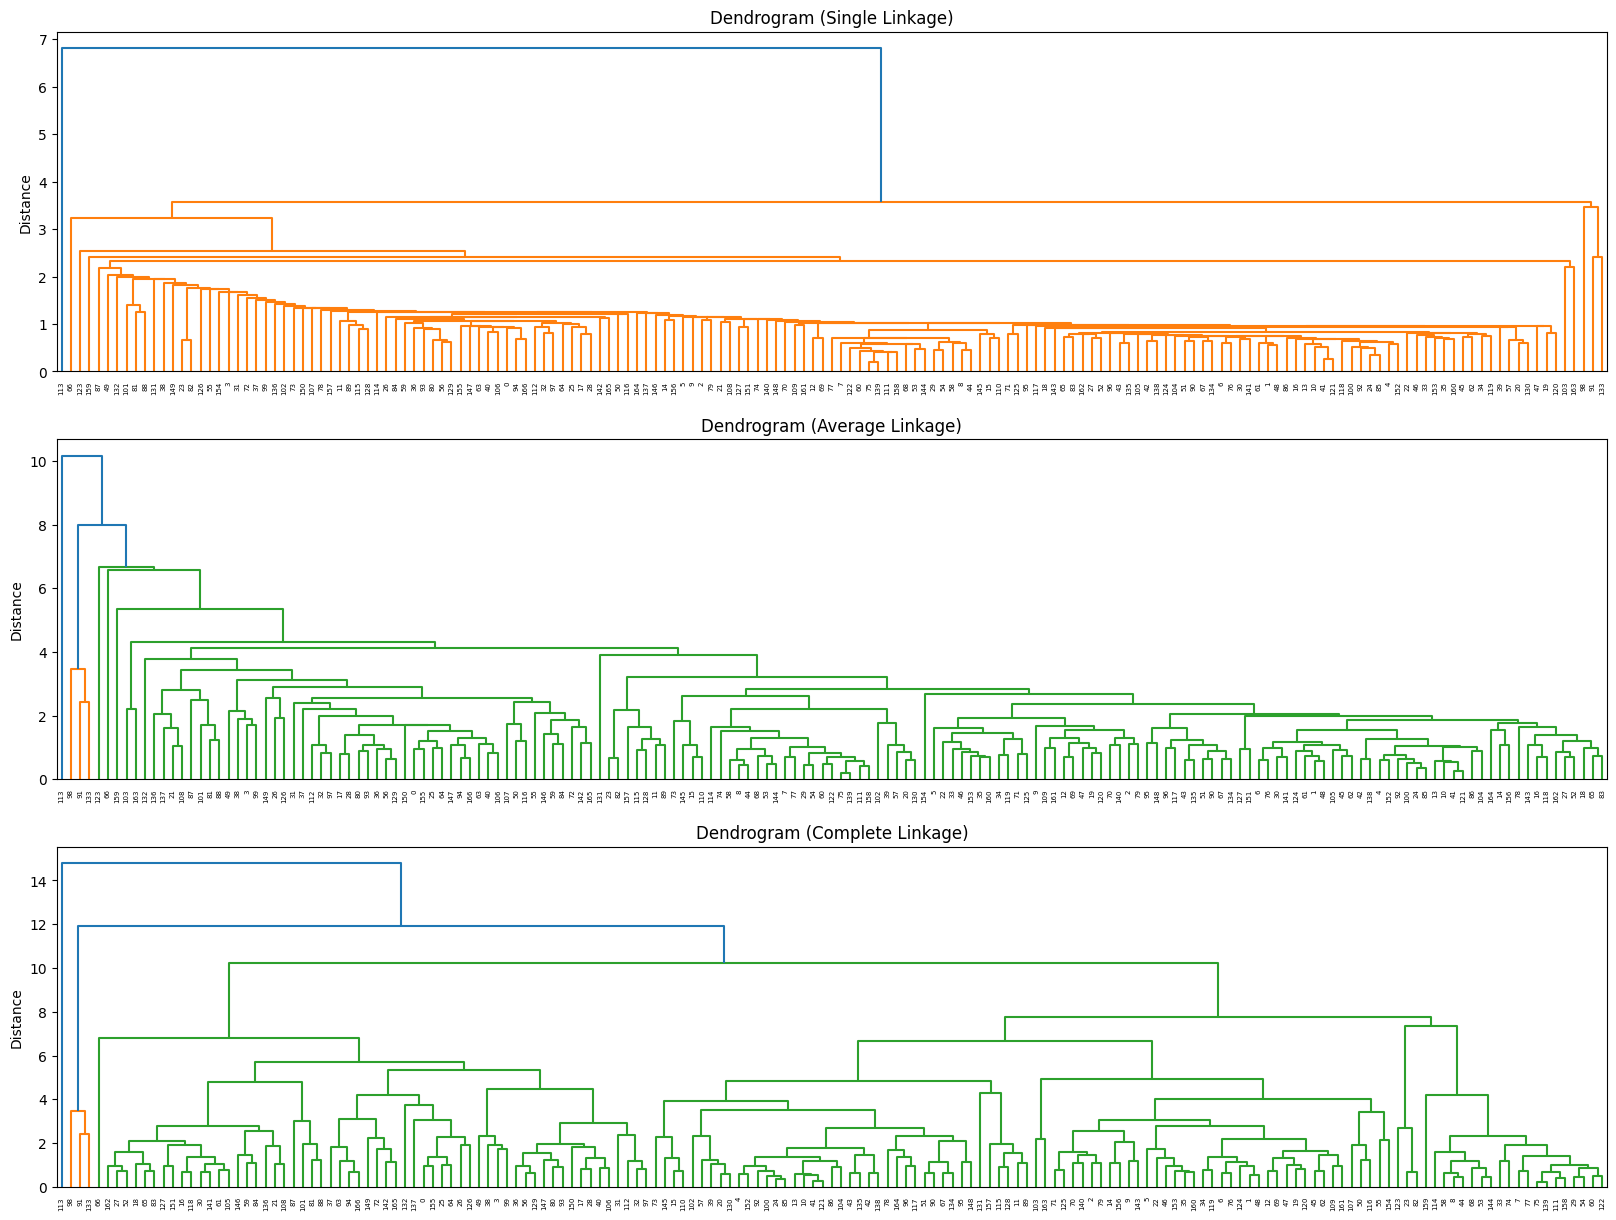

In [ ]:
# The List of all linkage methods to check
methods = ['single',
           'average',
           'complete']

# Create a subplot image
fig, axs = plt.subplots(len(methods), 1, figsize = (20, 15))

# Enumerate through the list of all methods above, get linkage and plot dendrogram
for i, method in enumerate(methods):
    Z = linkage(data_scaled, metric = 'euclidean', method = method)

    dendrogram(Z, ax = axs[i]);
    axs[i].set_title(f'Dendrogram ({method.capitalize()} Linkage)')
    axs[i].set_ylabel('Distance')

<b><font color="#ffa100">Observations</font></b>

- We can see that the complete linkage gives better separated clusters. A cluster is considered better separated if the vertical distance connecting those clusters is higher.
- Now, we can set a threshold distance and draw a horizontal line. The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold.
- The branches of this dendrogram are cut at a level where there is a lot of ‘space’ to cut them, that is where the jump in levels of two consecutive nodes is large
- Here, we can choose to cut it at ~9 since the space between the two nodes is largest.

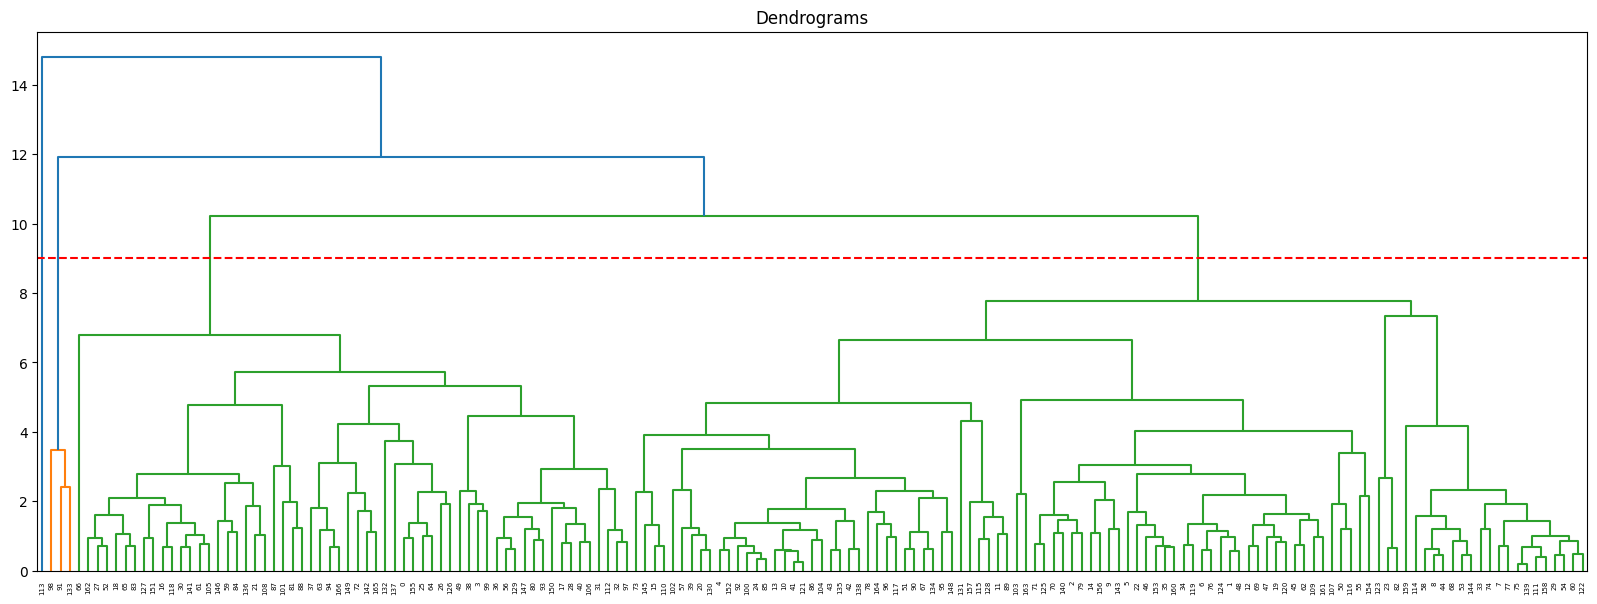

In [ ]:
plt.figure(figsize = (20, 7))

plt.title("Dendrograms")
dend = dendrogram(linkage(data_scaled, method = 'complete'))
plt.axhline(y = 9, color = 'r', linestyle = '--')

<b><font color="#ffa100">Observations</font></b>

- We can see that the if we create a horizontal line at threshold distance ~ 9, it cuts 4 vertical lines, i.e., we get 4 different clusters.  
- Let's fit the algorithms using 4 as the number of clusters.

In [ ]:
# Clustering with 4 clusters
hierarchical = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'complete')

hierarchical.fit(data_scaled)

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=4)

In [ ]:
data_scaled_copy['HCLabels'] = hierarchical.labels_

data['HCLabels'] = hierarchical.labels_

In [ ]:
data.HCLabels.value_counts()

,count
HCLabels,
0,103
1,60
2,3
3,1


<b><font color="#ffa100">Observations</font></b>

- The count of observations in the resulting 4 clusters is unevenly distributed.
- We have two clusters with only 3 countries and 1 country, respectively. Let's check the countries in these clusters.

In [ ]:
# Checking 3 countries in cluster 2
data[data.HCLabels == 2]

,index,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Labels,kmedoLabels,GmmLabels,HCLabels
91,91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,Underdeveloped,1,2,2
98,98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,Underdeveloped,0,2,2
133,133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,Underdeveloped,0,2,2


<b><font color="#ffa100">Observations</font></b>

- Similar to K-Means, we got a separate cluster for 3 small countries with the highest values for imports and exports - Luxembourg, Malta, Singapore.

In [ ]:
# Checking 1 country in cluster 3
data[data.HCLabels == 3]

,index,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Labels,kmedoLabels,GmmLabels,HCLabels
113,113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330,NaN,2,1,3


**Observations:**

- Cluster 3 consists of just one country - Nigeria.
- Nigeria has an inflation rate of 104 which is the highest inflation rate in this dataset. This might have made its distance with the other clusters significantly higher not allowing it to merge with any of those data points.

In [ ]:
# Calculating the mean and the median of the original data for each label
original_features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
num_cols = original_features + ['HCLabels']
mean = data[num_cols].groupby('HCLabels').mean()

median = data[num_cols].groupby('HCLabels').median()

df_hierachical = pd.concat([mean, median], axis = 0)

df_hierachical.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_3 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median', 'group_3 Median']

df_hierachical[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_3 Mean,group_0 Median,group_1 Median,group_2 Median,group_3 Median
child_mort,16.678641,75.513333,4.133333,130.00,10.80,73.300,2.80,130.00
exports,42.532806,32.183667,176.000000,25.30,38.70,28.900,175.00,25.30
health,7.013883,6.505667,6.793333,5.07,6.91,5.685,7.77,5.07
imports,42.438504,49.535000,156.666667,17.40,38.40,47.650,154.00,17.40
income,23425.533981,4218.050000,64033.333333,5150.00,17800.00,2500.000,72100.00,5150.00
inflation,6.723262,8.261100,2.468000,104.00,4.49,5.860,3.62,104.00
life_expec,75.471845,61.740000,81.433333,60.50,76.10,61.300,81.30,60.50
total_fer,2.074660,4.477333,1.380000,5.84,1.93,4.710,1.36,5.84
gdpp,18053.689320,2174.233333,57566.666667,2330.00,10700.00,1185.000,46600.00,2330.00


**Observations:**

- It looks like Cluster 2 has only 3 countries with high income and high gdpp, Cluster 1 has low income and low gdpp countries, and the rest of the countries are in cluster 0 except for one country which is in cluster 3.

Let's try to visualize the boxplots of different attributes for each cluster to see if we can spot some more granular patterns.

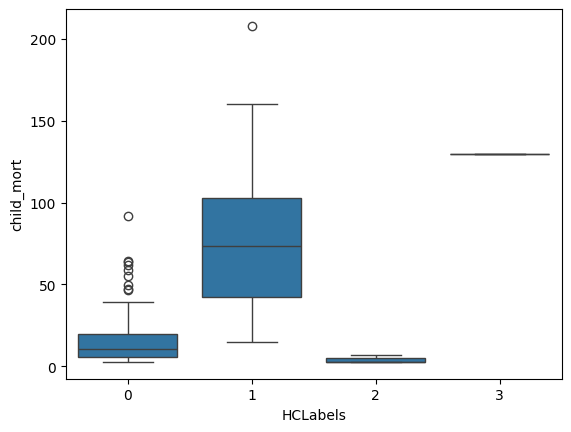

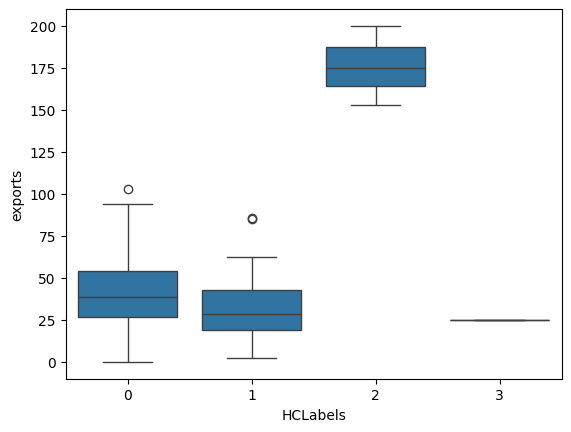

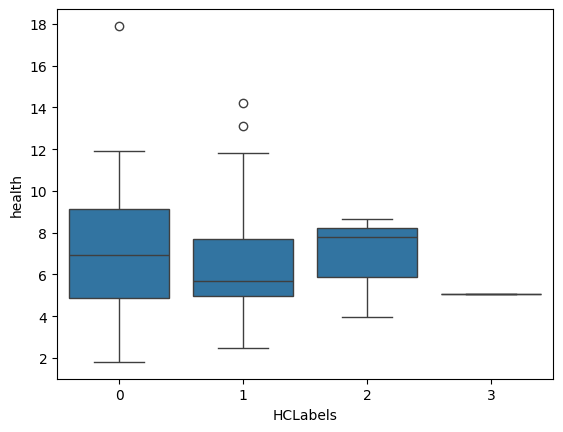

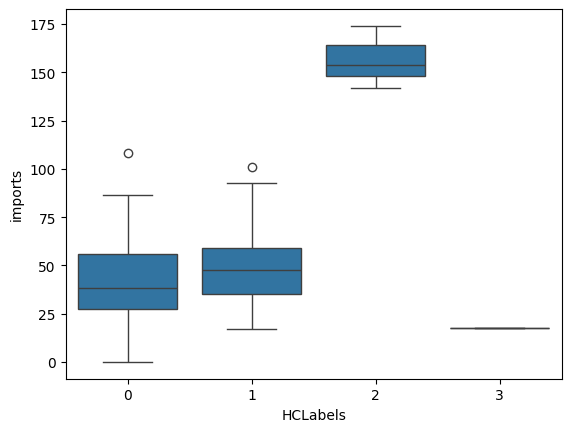

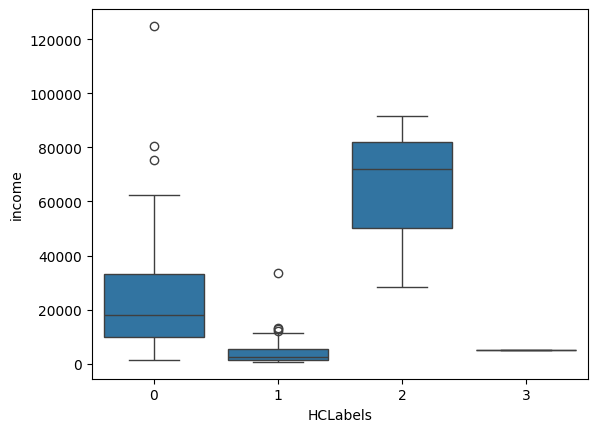

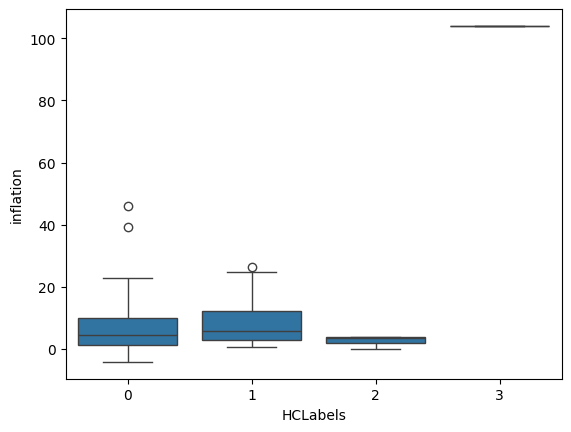

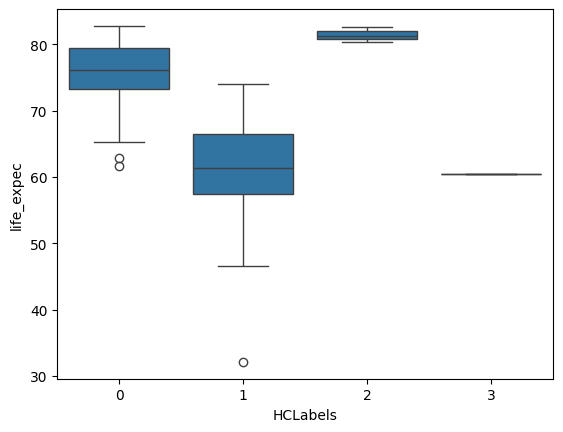

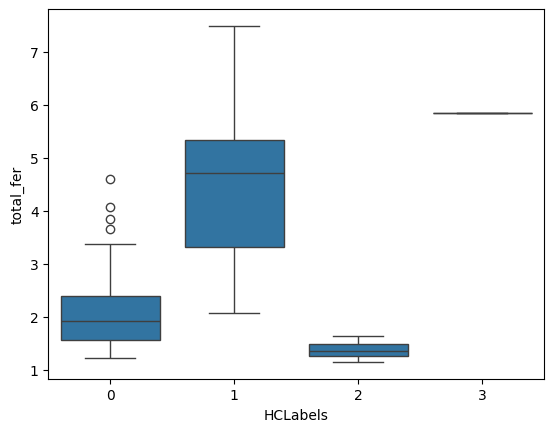

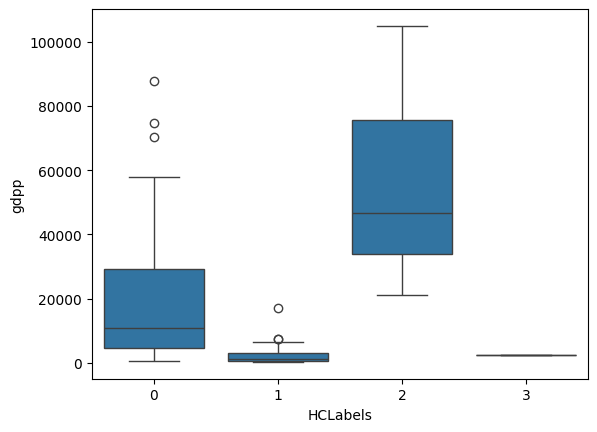

In [ ]:
cols_visualise = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

for col in cols_visualise:
    sns.boxplot(x = 'HCLabels', y = col, data = data)
    plt.show()


**Observations:**
- The results from hierarchical clustering seem to be difficult to distinguish and comment on especially because of one cluster which contains 103 countries

Let's try to use DBSCAN algorithm

<h1><b><font color='#90EE90'>DBSCAN</font></b></h1>

<b><u>DBSCAN (Density-Based Spatial Clustering of Applications with Noise)</u></b> is a density-based clustering algorithm that groups together data points that are closely packed together (high density) and marks as outliers the points that lie alone in low-density regions. Unlike K-means, DBSCAN doesn't require you to pre-specify the number of clusters.

<b>How it works:</b>

- <u>Core Points:</u> A point is considered a core point if there are at least min_samples points within a distance of eps from it (including the point itself).
- <u>Border Points:</u> A point that isn't a core point but is within eps distance of a core point.
- <u>Noise Points:</u> Points that are neither core nor border points.

In [ ]:
# Initiating DBSCAN algorithm
dbs = DBSCAN(eps = 1) # eps: The maximum distance between two samples for them to be considered neighbors.

# Fitting the data to the algorithm
data_scaled_copy['DBSLabels'] = dbs.fit_predict(data_scaled)

# Predicting the labels
data['DBSLabels'] = dbs.fit_predict(data_scaled)

In [ ]:
# Counting number of unique clusters
data['DBSLabels'].value_counts()

,count
DBSLabels,
-1,90
0,55
1,17
2,5


<b><font color="#ffa100">Analysis of values in each of the Labels</font></b>

In [ ]:
# Define original features and feature columns for analysis
original_features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']  # These are the original features we are interested in analyzing across different clusters.
num_cols = original_features + ['DBSLabels']
# We create a list of columns that includes both the original features and the 'DBSLabels' column,
# which presumably contains the cluster assignments.

mean = data[num_cols].groupby('DBSLabels').mean() # Calculate the mean value of each feature per cluster
# This groups the data by the 'DBSLabels' (clusters) and then calculates the mean of each of the features
# in the 'num_cols' list for each cluster.  The result is a DataFrame with clusters as rows and features as columns.

median = data[num_cols].groupby('DBSLabels').median() # Calculate the median value of each feature per cluster
# This does the same as above, but calculates the median instead of the mean.

df_hierachical = pd.concat([mean, median], axis=0) # Combine mean and median results into a single DataFrame
# This concatenates the 'mean' and 'median' DataFrames vertically (axis=0) to create a single DataFrame
# that contains both the mean and median values for each feature in each cluster.

df_hierachical.index = ['group_-1 Mean', 'group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_-1 Median', 'group_0 Median', 'group_1 Median', 'group_2 Median'] # Create informative index labels for the combined DataFrame
# This assigns new labels to the rows (index) of the combined DataFrame. These labels indicate which cluster the values are for
# and whether they are the mean or median.

df_hierachical[original_features].T # Transpose the DataFrame to have features as rows and clusters as columns
# This selects only the original features (excluding 'DBSLabels') from the DataFrame, then transposes it.
# The result is a DataFrame where the rows are the features and the columns are the cluster labels with their corresponding mean and median values.

,group_-1 Mean,group_0 Mean,group_1 Mean,group_2 Mean,group_-1 Median,group_0 Median,group_1 Median,group_2 Median
child_mort,54.907778,17.130909,4.147059,87.340,50.900,15.70,4.100,90.20
exports,42.922211,41.525455,35.194118,24.000,36.100,37.00,29.900,22.80
health,6.254556,6.709455,10.294706,6.256,5.275,6.55,10.100,6.01
imports,48.265177,49.510909,33.982353,37.200,42.400,51.30,31.000,34.90
income,16254.611111,13433.090909,38382.352941,1785.600,5170.000,11200.00,38800.000,1610.00
inflation,11.155856,4.015527,1.309118,10.486,8.605,3.53,0.873,9.44
life_expec,67.202222,74.203636,81.076471,55.020,67.700,74.50,81.300,54.50
total_fer,3.578222,2.067455,1.708235,5.504,3.250,1.92,1.630,5.43
gdpp,10940.611111,8043.018182,43200.000000,718.600,2775.000,6250.00,41900.000,553.00


**Observations:**

- DBSCAN returns 4 clusters. The countries in 3 of these clusters have similar profiles to the results seen in the other clustering algorithms - high income, low income and moderately developed countries.
- The country profile of the last cluster (cluster -1) seems uncertain. This cluster has a large difference between the mean values and the median values of various attributes implying the presence of outliers in the cluster.   

Let's visualize the box plots to comment further on these clusters

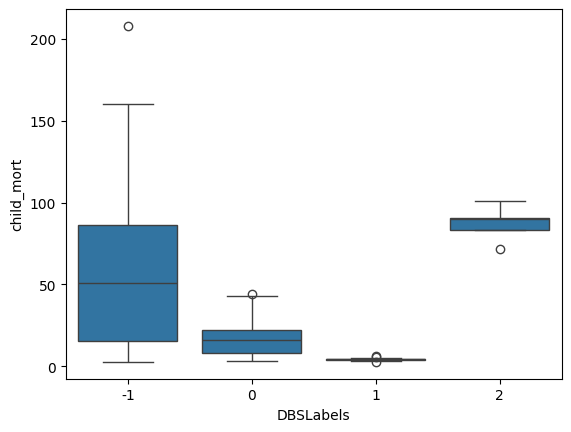

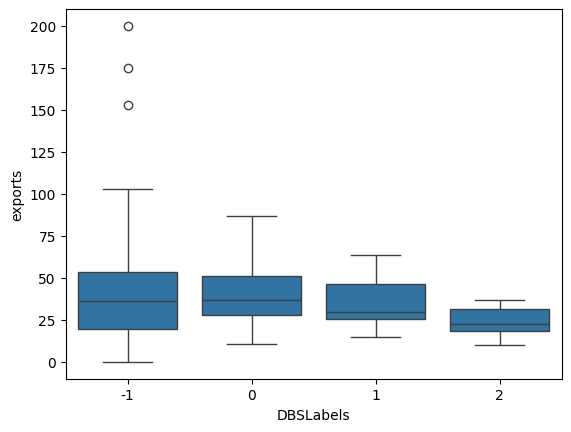

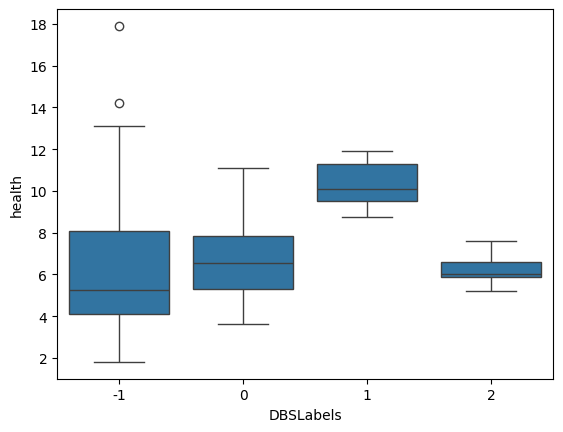

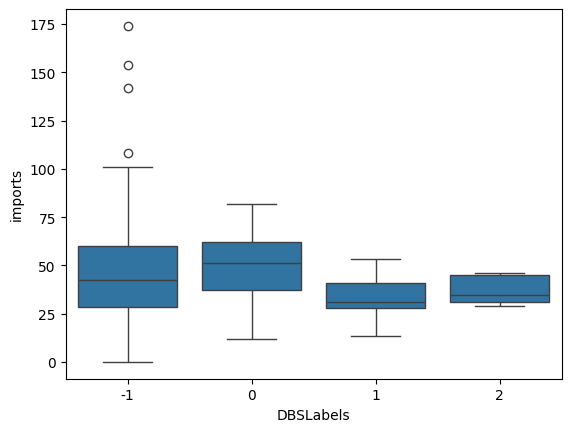

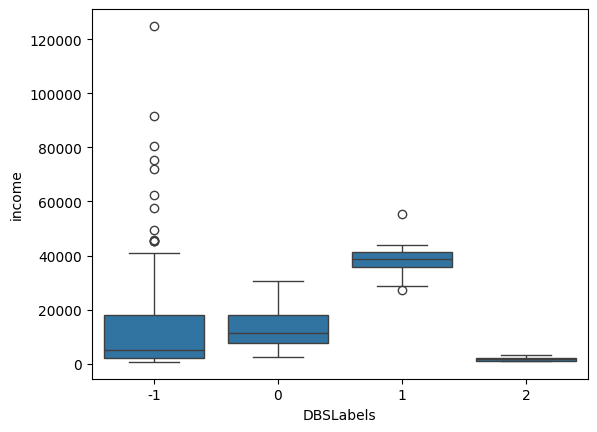

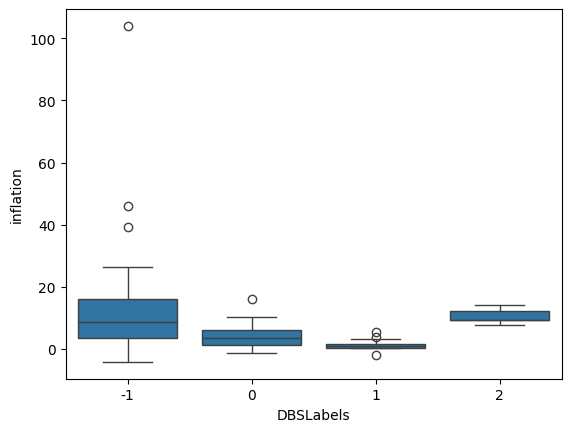

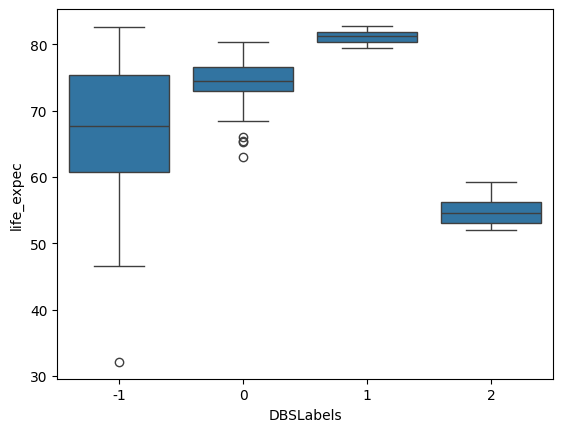

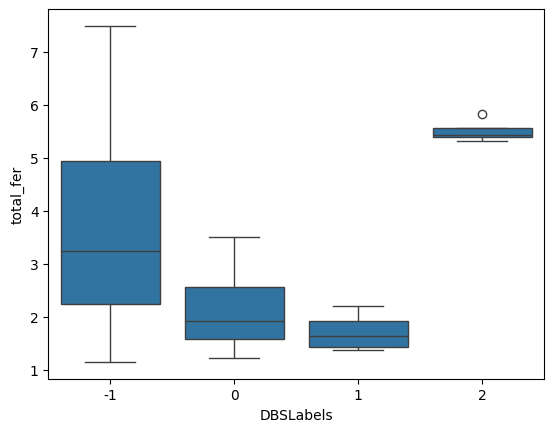

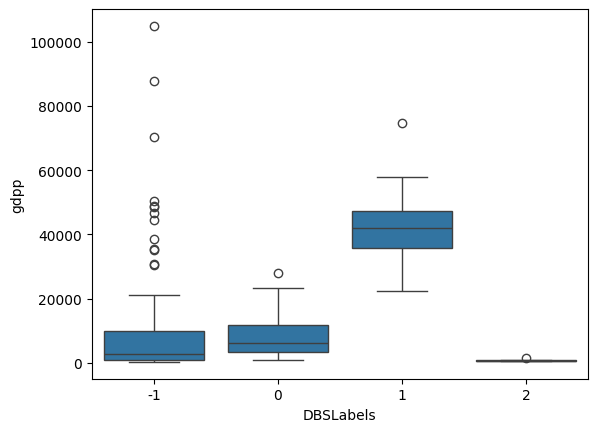

In [ ]:
for col in cols_visualise:
    sns.boxplot(x = 'DBSLabels', y = col, data = data)
    plt.show()

**Observations**
- We can see that while the three clusters (0, 1, and 2) seem to be way more compact across all attributes, cluster -1 consists of extreme outliers on at least one attribute.
- Therefore, it is not adding any value to our cluster analysis. We can explore it further to understand which type of countries it consists of.

## **Conclusion**

The choice of clustering algorithm here will depend on the context and use case. But purely based on foundations of 'what good clustering looks like', one can propose K-Medoids as it has extreme clusters that are more distinct from each other.